# EDA

Vamos a realizar la exploración de datos para tratar de identificar patrones, relaciones, tendencias, anomalias, etc, que nos ayuden a poder definir KPIs.

In [ ]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#Carga del archivo XLSX. Este archivo tiene varias hojas. 
# Ya que tiene varias hojas. Vamos a leer el file como un diccionario de DataFrames
file = pd.read_excel("Data/Internet.xlsx", sheet_name=None)

In [870]:
# Hacemos un print de los nombres de todas las hojas.
print("Total sheets:", len(file), end="\n\n")
for num, key in enumerate(file.keys()):
    print(f"{num}: {key}")

Total sheets: 15

0: Acc_vel_loc_sinrangos
1: Velocidad_sin_Rangos
2: Accesos_tecnologia_localidad
3: Velocidad % por prov
4: Totales VMD
5: Totales Accesos Por Tecnología
6: Accesos Por Tecnología
7: Penetración-poblacion
8: Penetracion-hogares
9: Penetracion-totales
10: Totales Accesos por rango
11: Accesos por rangos
12: Dial-BAf
13: Totales Dial-BAf
14: Ingresos 


# Acc_vel_loc_sinrangos

In [20]:
# Revisión del primer dataset
data_df = file["Acc_vel_loc_sinrangos"]
data_df.head()

,Provincia,Partido,Localidad,link INDEC,Velocidad (Mbps),Accesos
0,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,Sin Datos,1024.0,1.0
1,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,0.0,590.0
2,SAN LUIS,La Capital,San Luis,74056150,1000.0,10350.0
3,SAN LUIS,General Pedernera,Villa Mercedes,74035070,1000.0,4570.0
4,BUENOS AIRES,Lomas De Zamora,Banfield,6490010,1000.0,4513.0


In [ ]:
data_df.info()
# Vemos valores nulos en Localidad. y Accesos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   link INDEC        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


In [ ]:
data_df.describe()
# Observaciones:
# - Accesos: Vemos un valor negativo (?) Qué significado tiene esto.
# - Velocidad : 0 . Qué significado tiene esto? ¿Posiblenmente velocidades menores a 1Mbps?

,Velocidad (Mbps),Accesos
count,18864.000000,18857.000000
mean,66.866042,612.828499
std,178.987138,6283.359677
min,0.000000,-5582.000000
25%,3.000000,3.000000
50%,10.000000,26.000000
75%,30.000000,180.000000
max,1024.000000,576789.000000


In [ ]:
#Planes de velocidad. Notamos que hay registros con planes de velocidad == 0.
np.sort(data_df["Velocidad (Mbps)"].unique())

array([0.0000e+00, 2.5600e-01, 5.0000e-01, 5.1200e-01, 7.5000e-01,
       1.0000e+00, 1.5000e+00, 2.0000e+00, 2.2000e+00, 2.5000e+00,
       3.0000e+00, 3.3000e+00, 3.5000e+00, 4.0000e+00, 4.5000e+00,
       5.0000e+00, 6.0000e+00, 6.4000e+00, 7.0000e+00, 7.5000e+00,
       8.0000e+00, 9.0000e+00, 1.0000e+01, 1.0100e+01, 1.0200e+01,
       1.1000e+01, 1.2000e+01, 1.2300e+01, 1.3000e+01, 1.4000e+01,
       1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01, 2.0000e+01,
       2.0500e+01, 2.1000e+01, 2.2000e+01, 2.3000e+01, 2.4000e+01,
       2.5000e+01, 2.5100e+01, 2.5500e+01, 2.6000e+01, 2.7000e+01,
       3.0000e+01, 3.1000e+01, 3.2000e+01, 3.5000e+01, 3.6000e+01,
       4.0000e+01, 4.1000e+01, 4.5000e+01, 4.8000e+01, 4.9000e+01,
       5.0000e+01, 5.0100e+01, 5.0250e+01, 5.1000e+01, 5.5000e+01,
       5.9000e+01, 6.0000e+01, 6.1000e+01, 6.5000e+01, 6.6000e+01,
       7.0000e+01, 7.5000e+01, 8.0000e+01, 8.5000e+01, 9.0000e+01,
       9.5000e+01, 9.8000e+01, 1.0000e+02, 1.0010e+02, 1.0025e

## Revisión de Nulos

In [ ]:
# En la columna Localidad, Vemos una localidad con valor NaN, y adicionalmente vemos una cantidad de accesos Negativa (-5582). Lo cual no parece tener sentido.
data_df[data_df["Localidad"].isnull()]

,Provincia,Partido,Localidad,link INDEC,Velocidad (Mbps),Accesos
1527,CABA,Ciudad Autónoma de Buenos Aires,NaN,Sin Datos,300.0,-5582.0


In [ ]:
# Adicionalmente vemos otra entrada para la Velocidad de 300Mbps. Posiblemente esta entrada inicial es un error.
mask = (data_df["Provincia"]=='CABA') & (data_df["Velocidad (Mbps)"]==300)
data_df[mask]

,Provincia,Partido,Localidad,link INDEC,Velocidad (Mbps),Accesos
1527,CABA,Ciudad Autónoma de Buenos Aires,NaN,Sin Datos,300.0,-5582.0
13240,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,300.0,576789.0


In [50]:
# Dropeamos la entrada nula mencionada.
data_df.drop(index=1527, inplace=True)

In [ ]:
# Nulos en columna accesos.
data_df[data_df["Accesos"].isnull()]
# Corresponden a velocidades posiblemente menores a 0megas, indicando posiblemente que no tienen accesos con estas velocidades.
# Podríamos eliminarlas o convertirlas en 0. 
# En este caso optaremos por eliminarlas.

,Provincia,Partido,Localidad,link INDEC,Velocidad (Mbps),Accesos
18018,SANTIAGO DEL ESTERO,Choya,Frías,86063040,0.0,NaN
18019,SANTA FE,Rosario,General Lagos,82084150,0.0,NaN
18020,SALTA,San Carlos,San Carlos,66154040,0.0,NaN
18021,SALTA,San Carlos,Animaná,66154020,0.0,NaN
18022,SALTA,Cafayate,Tolombón,66021020,0.0,NaN
18023,ENTRE RIOS,Tala,Rosario del Tala,30091100,0.0,NaN
18024,CORRIENTES,Ituzaingó,Colonia Liebig's,18084010,0.0,NaN


In [ ]:
# Dropeamos los nulos.
data_df = data_df.dropna(subset=["Accesos"])
data_df.shape

(18856, 6)

In [64]:
# Lo siguiente que nos llama la atención son los accesos con valores negativos.
data_df[(data_df["Accesos"]<0)]

,Provincia,Partido,Localidad,link INDEC,Velocidad (Mbps),Accesos
18861,LA RIOJA,Otros,Otros,Sin Datos,0.0,-1.0
18862,CABA,Otros,Otros,Sin Datos,0.0,-590.0
18863,CORRIENTES,Otros,Otros,Sin Datos,0.0,-830.0


In [66]:
# Dado que parece ser errores de información, procedemos a eliminar estas entradas.
data_df.drop(index=[18861, 18862, 18863], inplace=True)
data_df.shape

(18853, 6)

In [ ]:
# Ya no tenemos valores nulos.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18853 entries, 0 to 18860
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18853 non-null  object 
 1   Partido           18853 non-null  object 
 2   Localidad         18853 non-null  object 
 3   link INDEC        18853 non-null  object 
 4   Velocidad (Mbps)  18853 non-null  float64
 5   Accesos           18853 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.0+ MB


## Planes de velocidad con 0Mbps

In [ ]:
mask = data_df["Velocidad (Mbps)"] == 0
data_df[mask].shape
#Tenemos un total de 836 entradas con plan == 0

(836, 6)

In [ ]:
# Tenemos un total de 342789 accesos con velocidad = 0Mbps. Este es un número considerable. 
# Existen dos posibilidades a mi criterio:
#   - Son errores de entrada de datos.
#   - 
data_df[mask]["Accesos"].sum()

np.float64(342789.0)

Tenemos un total de 342789 accesos con velocidad = 0Mbps. Este es un número considerable. 

Existen dos posibilidades a mi criterio:

  - Son errores de entrada de datos.
  - Son accesos con velocidades extramadamente bajas.

Optamos por no tocar estos datos y considerar la segunda opción, ya que se trata de un número considerable.

## Cantidad de Accesos por Provincia

In [233]:
# Hacemos una suma datos por provincia aplicando la funcion de agregación
graph_data = data_df.groupby("Provincia").agg(func={"Accesos" : "sum"}).sort_values(by="Accesos", ascending=False)

In [234]:
graph_data

,Accesos
Provincia,
BUENOS AIRES,4989380.0
CABA,1469771.0
CORDOBA,1085774.0
SANTA FE,930973.0
MENDOZA,301653.0
ENTRE RIOS,294311.0
TUCUMAN,266914.0
MISIONES,206554.0
SALTA,201341.0


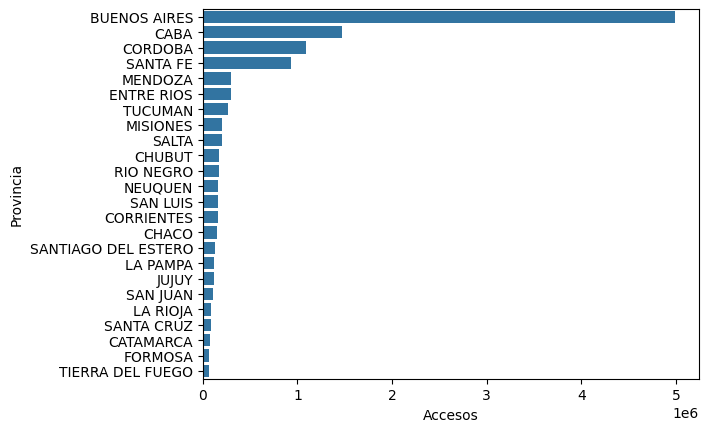

In [109]:
ax = sns.barplot(data=graph_data, x="Accesos", y="Provincia")

Observamos que la mayor cantidad de accesos actualmente se encuentran siteados en la provincia de BUENOS AIRES

Posteriormente podríamos comparar esta data con:
 
 - Cantidad de habitantes
 - Cantidad de hogares
 - Área geográfica

## Top planes de velocidad

In [126]:
graph_data = data_df.groupby(["Velocidad (Mbps)"]).agg(func={"Accesos" : "sum"}).sort_values(by="Accesos", ascending=False)

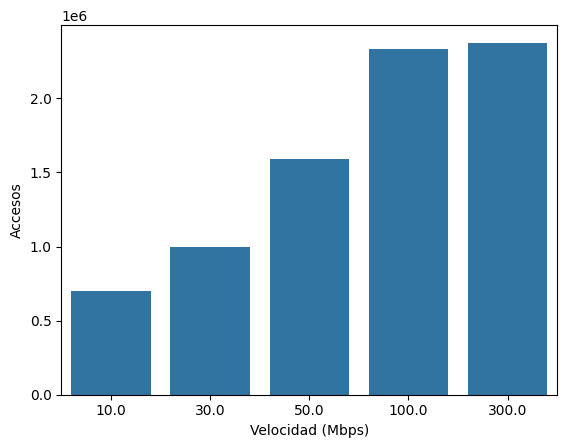

In [145]:
ax = sns.barplot(data=graph_data.head(5), x="Velocidad (Mbps)", y="Accesos")

En general vemos que los planes mas populares son los de 10, 30, 50, 100 y 300 megas.

## Velocidad Media de acceso por Region

Aqui lo que debemos hacer es calcular un promedio ponderado agrupado por region.

In [229]:
# Creamos una copia del dataset.
test_df = data_df.copy()

# Calculamos producto parcial
test_df["Velocidad (Mbps) x Accesos"] = test_df["Velocidad (Mbps)"]*test_df["Accesos"]

# Agrupamos por Provincia y calculamos las sumas productos parcial y cantidad de accesos
summary_df = test_df.groupby(by="Provincia").agg(func={"Accesos": "sum",
                                                       "Velocidad (Mbps) x Accesos": "sum",})

#calculamos el promedio por region.
summary_df["Average Speed(Mbps)"]= summary_df["Velocidad (Mbps) x Accesos"]/summary_df["Accesos"]

# Ordenamos valores. y dropeamos la columna de productos parciales
summary_df = summary_df.sort_values(by="Average Speed(Mbps)", ascending=False).reset_index().drop(columns="Velocidad (Mbps) x Accesos")

#mostramos el df.
summary_df

,Provincia,Accesos,Average Speed(Mbps)
0,CABA,1469771.0,232.920150
1,SAN LUIS,157609.0,174.727460
2,BUENOS AIRES,4989380.0,153.449607
3,CORDOBA,1085774.0,115.565923
4,TUCUMAN,266914.0,108.785476
5,CHACO,147092.0,105.410026
6,CORRIENTES,157305.0,100.275717
7,SANTA FE,930973.0,99.349279
8,CATAMARCA,75074.0,97.314293
9,ENTRE RIOS,294311.0,96.183904


<Axes: xlabel='Average Speed(Mbps)'>

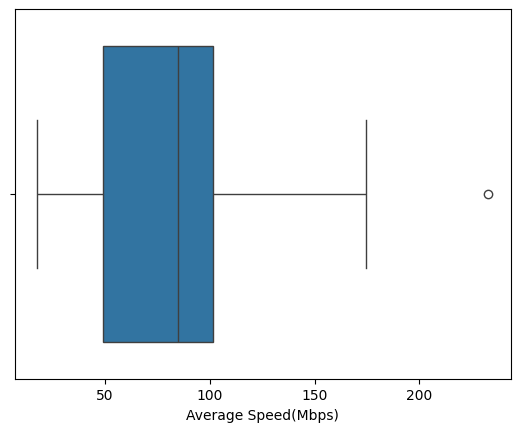

In [ ]:
# Hacemos un boxplot para ver como se distribuyen estos valores con respecto a la cantidad de accesos.
sns.boxplot(data=summary_df, x="Average Speed(Mbps)")

Observaciones:
- Las regiones con mayores velocidades medias son: CABA, SAN LUIS, BUENOS AIRES, CORDOBA y TUCUMAN.
- Las regiones con menores velocidades medias son: LA PAMPA, SAN JUAN, SANTA CRUZ, TIERRA DEL FUEGO y CHUBUT
- La región de CABA sería un OUTLIER dentro de los valores.

## Categorización de Regiones de acuerdo a su velocidad media

En base a lo observado en el apartado anterior, vamos a segmentar las 24 provincias en 4 grupos de 6 provincias, en base a sus similitudes de ancho de banda medio. 

De esta manera simplificamos el análisis y las visualizaciones.

In [ ]:
# Creamos la categorización.
summary_df["Categoria"] = summary_df.index//6 + 1

In [ ]:
# Visualizamos
summary_df

,Provincia,Accesos,Average Speed(Mbps),Categoria
0,CABA,1469771.0,232.920150,1
1,SAN LUIS,157609.0,174.727460,1
2,BUENOS AIRES,4989380.0,153.449607,1
3,CORDOBA,1085774.0,115.565923,1
4,TUCUMAN,266914.0,108.785476,1
5,CHACO,147092.0,105.410026,1
6,CORRIENTES,157305.0,100.275717,2
7,SANTA FE,930973.0,99.349279,2
8,CATAMARCA,75074.0,97.314293,2
9,ENTRE RIOS,294311.0,96.183904,2


# Velocidad sin Rangos

In [445]:
data_df = file["Velocidad_sin_Rangos"].copy()

In [446]:
data_df.describe()

,Año,Trimestre,Velocidad,Accesos
count,18884.000000,18884.000000,18874.000000,1.888400e+04
mean,2021.017104,2.477653,96.171156,1.412328e+04
std,1.919740,1.126947,379.722905,6.856387e+04
min,2017.000000,1.000000,0.000000,0.000000e+00
25%,2019.000000,1.000000,4.000000,2.600000e+01
50%,2021.000000,2.000000,12.300000,6.725000e+02
75%,2023.000000,4.000000,50.100000,6.114000e+03
max,2024.000000,4.000000,10000.000000,1.346370e+06


In [447]:
# Vistazo rápido
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


Detectamos 10 valores nulos en la columna Velocidad. Optamos por removerlos ya que no son valores considerables.

In [448]:
# Valores nulos columna velocidad.
data_df[data_df["Velocidad"].isnull()]

,Año,Trimestre,Provincia,Velocidad,Accesos
6758,2020,4,Buenos Aires,NaN,4
7497,2021,1,Buenos Aires,NaN,4
8245,2021,2,Buenos Aires,NaN,4
9013,2021,3,Buenos Aires,NaN,4
12274,2022,3,Córdoba,NaN,1
12756,2022,3,Santa Fe,NaN,9
14826,2023,2,Córdoba,NaN,1
15312,2023,2,Santa Fe,NaN,9
17427,2024,1,Córdoba,NaN,1
17916,2024,1,Santa Fe,NaN,9


In [449]:
#remoción de valores
data_df.dropna(subset=["Velocidad"], inplace=True)

In [450]:
# Los demas valores se ven ok.
data_df.describe()

,Año,Trimestre,Velocidad,Accesos
count,18874.000000,18874.000000,18874.000000,1.887400e+04
mean,2021.016531,2.477800,96.171156,1.413076e+04
std,1.919854,1.127001,379.722905,6.858127e+04
min,2017.000000,1.000000,0.000000,0.000000e+00
25%,2019.000000,1.000000,4.000000,2.600000e+01
50%,2021.000000,2.000000,12.300000,6.750000e+02
75%,2023.000000,4.000000,50.100000,6.116750e+03
max,2024.000000,4.000000,10000.000000,1.346370e+06


Detectamos valores no normalizados en la columna Provincia.

In [451]:
np.sort(data_df["Provincia"].unique())

array(['BUENOS AIRES', 'Buenos Aires', 'CABA', 'CATAMARCA', 'CHACO',
       'CHUBUT', 'CORDOBA', 'CORRIENTES', 'Capital Federal', 'Catamarca',
       'Chaco', 'Chubut', 'Corrientes', 'Córdoba', 'ENTRE RIOS',
       'Entre Ríos', 'FORMOSA', 'Formosa', 'JUJUY', 'Jujuy', 'LA PAMPA',
       'LA RIOJA', 'La Pampa', 'La Rioja', 'MENDOZA', 'MISIONES',
       'Mendoza', 'Misiones', 'NEUQUEN', 'Neuquén', 'RIO NEGRO',
       'Río Negro', 'SALTA', 'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ',
       'SANTA FE', 'SANTIAGO DEL ESTERO', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago Del Estero',
       'TIERRA DEL FUEGO', 'TUCUMAN', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [452]:
# Normalizamos.

#Primero aplicamos caps a todos los valores
data_df["Provincia"] = data_df["Provincia"].apply(str.upper)

#Removemos los acentos.
replace_dict = {"Á" : "A", "É" : "E", "Í" : "I", "Ó" : "O", "Ú": "U"}
for key, value in replace_dict.items():
    data_df["Provincia"] = data_df["Provincia"].apply(str.replace, args=(key, value))

# Ultimamente observamos que CABA y CAPITAL FEDERAL representan la misma provincia
data_df["Provincia"] = data_df["Provincia"].apply(str.replace, args=("CAPITAL FEDERAL", "CABA"))


In [453]:
# Observamos el resultado.
print(np.sort(data_df["Provincia"].unique()))
print(len(np.sort(data_df["Provincia"].unique())))

['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
24


In [455]:
Hoja_2 = data_df.copy()

Con esta información se nos ocurre observar lo siguiente:

1. El incremento de la cantidad de enlaces por región por trimistres o anual.
2. El incremento de la velocidad media por región  de manera trimestral o anual

## Incremento de cantidad de enlaces por región

In [366]:
#Agregamos la cantidad de enlaces por Provincia, Año y trimestre.
test_df = data_df.groupby(by=["Provincia", "Año", "Trimestre" ]).agg(func={"Accesos" : "sum"}).reset_index()

In [367]:
# Calculamos el desfase de accesos.
test_df["Desfase_Accesos"] = test_df.groupby(by="Provincia")["Accesos"].shift(1)
# Reemplazamos los valores Nulos.
test_df["Desfase_Accesos"] = test_df["Desfase_Accesos"].fillna(0)

In [ ]:
# Calculamos el incremento e incremento porcentual
test_df["Incremento Accesos"] = test_df["Accesos"] - test_df["Desfase_Accesos"] 
test_df["Incremento % Accesos"] = test_df["Incremento Accesos"]/test_df["Desfase_Accesos"] * 100
# Al dividir entre 0 se crean valores infinitos. Reemplazamos por 0.
test_df.replace([np.inf, -np.inf], 0, inplace=True)
# Al restar accesos - desfase, los valores de incremento seran erroneos para la primera fila. Los volvemos 0.
test_df.loc[test_df["Desfase_Accesos"]==0, "Incremento Accesos"] = 0

In [370]:
# Vamos a crear una nueva columna periodo que una Año y Trimestre, para poder graficar correctamente.
test_df["Periodo"] = test_df["Año"].astype(str) + "-Q" + test_df["Trimestre"].astype(str)

In [371]:
#Visualizamos
test_df.head()

,Provincia,Año,Trimestre,Accesos,Desfase_Accesos,Incremento Accesos,Incremento % Accesos,Periodo
0,BUENOS AIRES,2017,4,3188332,0.0,0.0,0.000000,2017-Q4
1,BUENOS AIRES,2018,1,3471700,3188332.0,283368.0,8.887657,2018-Q1
2,BUENOS AIRES,2018,2,3500699,3471700.0,28999.0,0.835297,2018-Q2
3,BUENOS AIRES,2018,3,3610277,3500699.0,109578.0,3.130175,2018-Q3
4,BUENOS AIRES,2018,4,3636606,3610277.0,26329.0,0.729279,2018-Q4


In [409]:
test_df.describe()

,Año,Trimestre,Accesos,Desfase_Accesos,Incremento Accesos,Incremento % Accesos
count,648.000000,648.000000,6.480000e+02,6.480000e+02,648.000000,648.000000
mean,2020.629630,2.481481,4.115802e+05,3.937467e+05,5688.094136,2.827769
std,1.985695,1.135202,8.686412e+05,8.503445e+05,33566.207889,13.136608
min,2017.000000,1.000000,1.490000e+04,0.000000e+00,-273979.000000,-40.171803
25%,2019.000000,1.000000,8.620400e+04,7.888025e+04,0.000000,0.000000
50%,2021.000000,2.000000,1.294935e+05,1.233105e+05,1745.500000,1.228413
75%,2022.000000,4.000000,2.197040e+05,2.062508e+05,6099.500000,3.272189
max,2024.000000,4.000000,5.044557e+06,5.044557e+06,377249.000000,246.660145


Observaciones:
Vemos valores extremos en Incremento % Accesos. 250 y -40. Periodos de caída y auge ?.

<Axes: ylabel='Incremento % Accesos'>

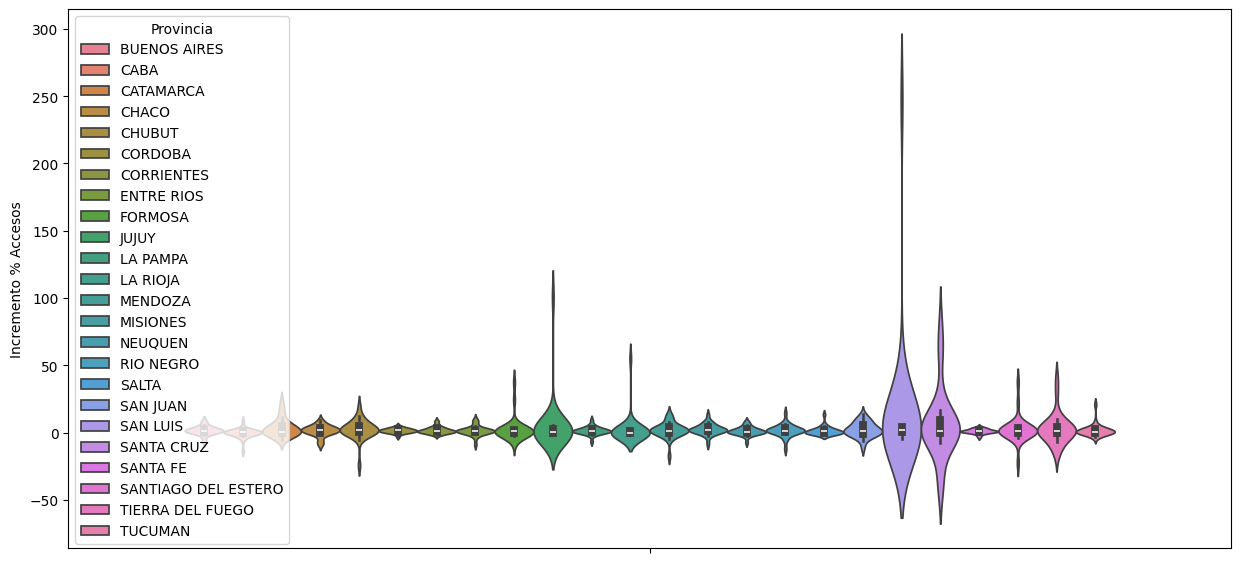

In [415]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=test_df, y="Incremento % Accesos", hue='Provincia')

<Axes: xlabel='Periodo', ylabel='Incremento % Accesos'>

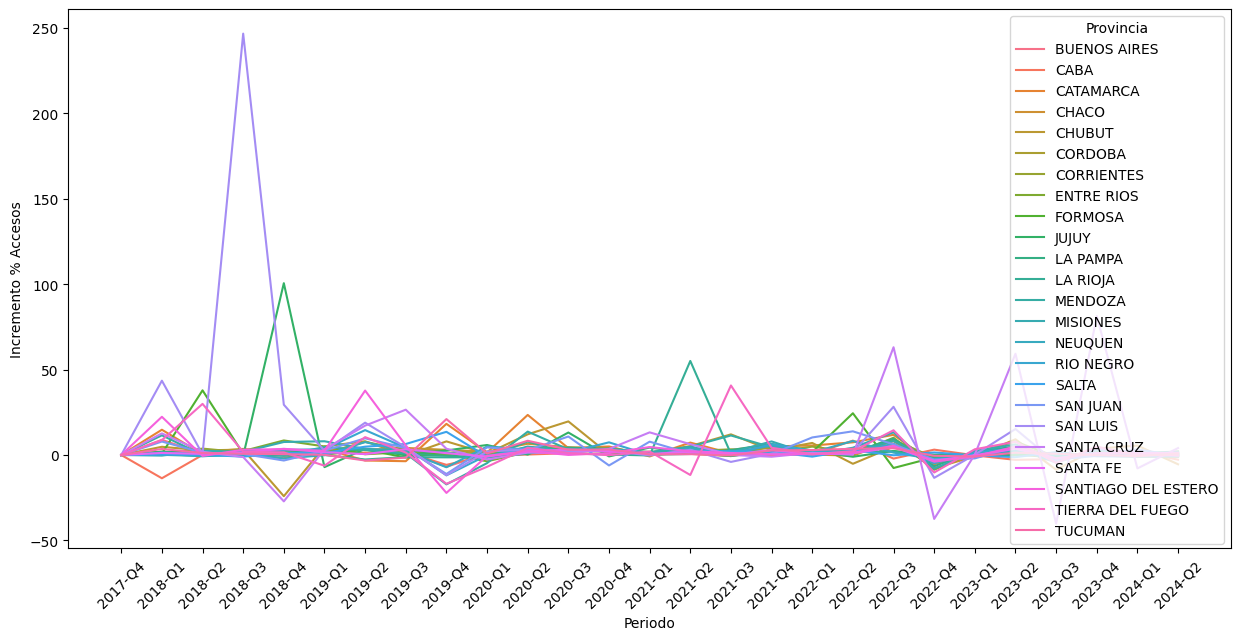

In [392]:
#Graficamos
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)

sns.lineplot(data=test_df, x="Periodo", y="Incremento % Accesos", hue="Provincia")

Visualmente no podemos tener mucho información ya que el gráfico se encuentra sobrecargado. Vamos a usar nuestro dataframe de categorización para segmentar y tener una mejor visibilidad.

In [394]:
category_df = summary_df[["Provincia", "Categoria"]]
category_df.head()

,Provincia,Categoria
0,CABA,1
1,SAN LUIS,1
2,BUENOS AIRES,1
3,CORDOBA,1
4,TUCUMAN,1


In [398]:
# Realizamos un merge y guardamos en nuevo df.
evol_enlaces_df = pd.merge(test_df, category_df, on='Provincia')
evol_enlaces_df.head()

,Provincia,Año,Trimestre,Accesos,Desfase_Accesos,Incremento Accesos,Incremento % Accesos,Periodo,Categoria
0,BUENOS AIRES,2017,4,3188332,0.0,0.0,0.000000,2017-Q4,1
1,BUENOS AIRES,2018,1,3471700,3188332.0,283368.0,8.887657,2018-Q1,1
2,BUENOS AIRES,2018,2,3500699,3471700.0,28999.0,0.835297,2018-Q2,1
3,BUENOS AIRES,2018,3,3610277,3500699.0,109578.0,3.130175,2018-Q3,1
4,BUENOS AIRES,2018,4,3636606,3610277.0,26329.0,0.729279,2018-Q4,1


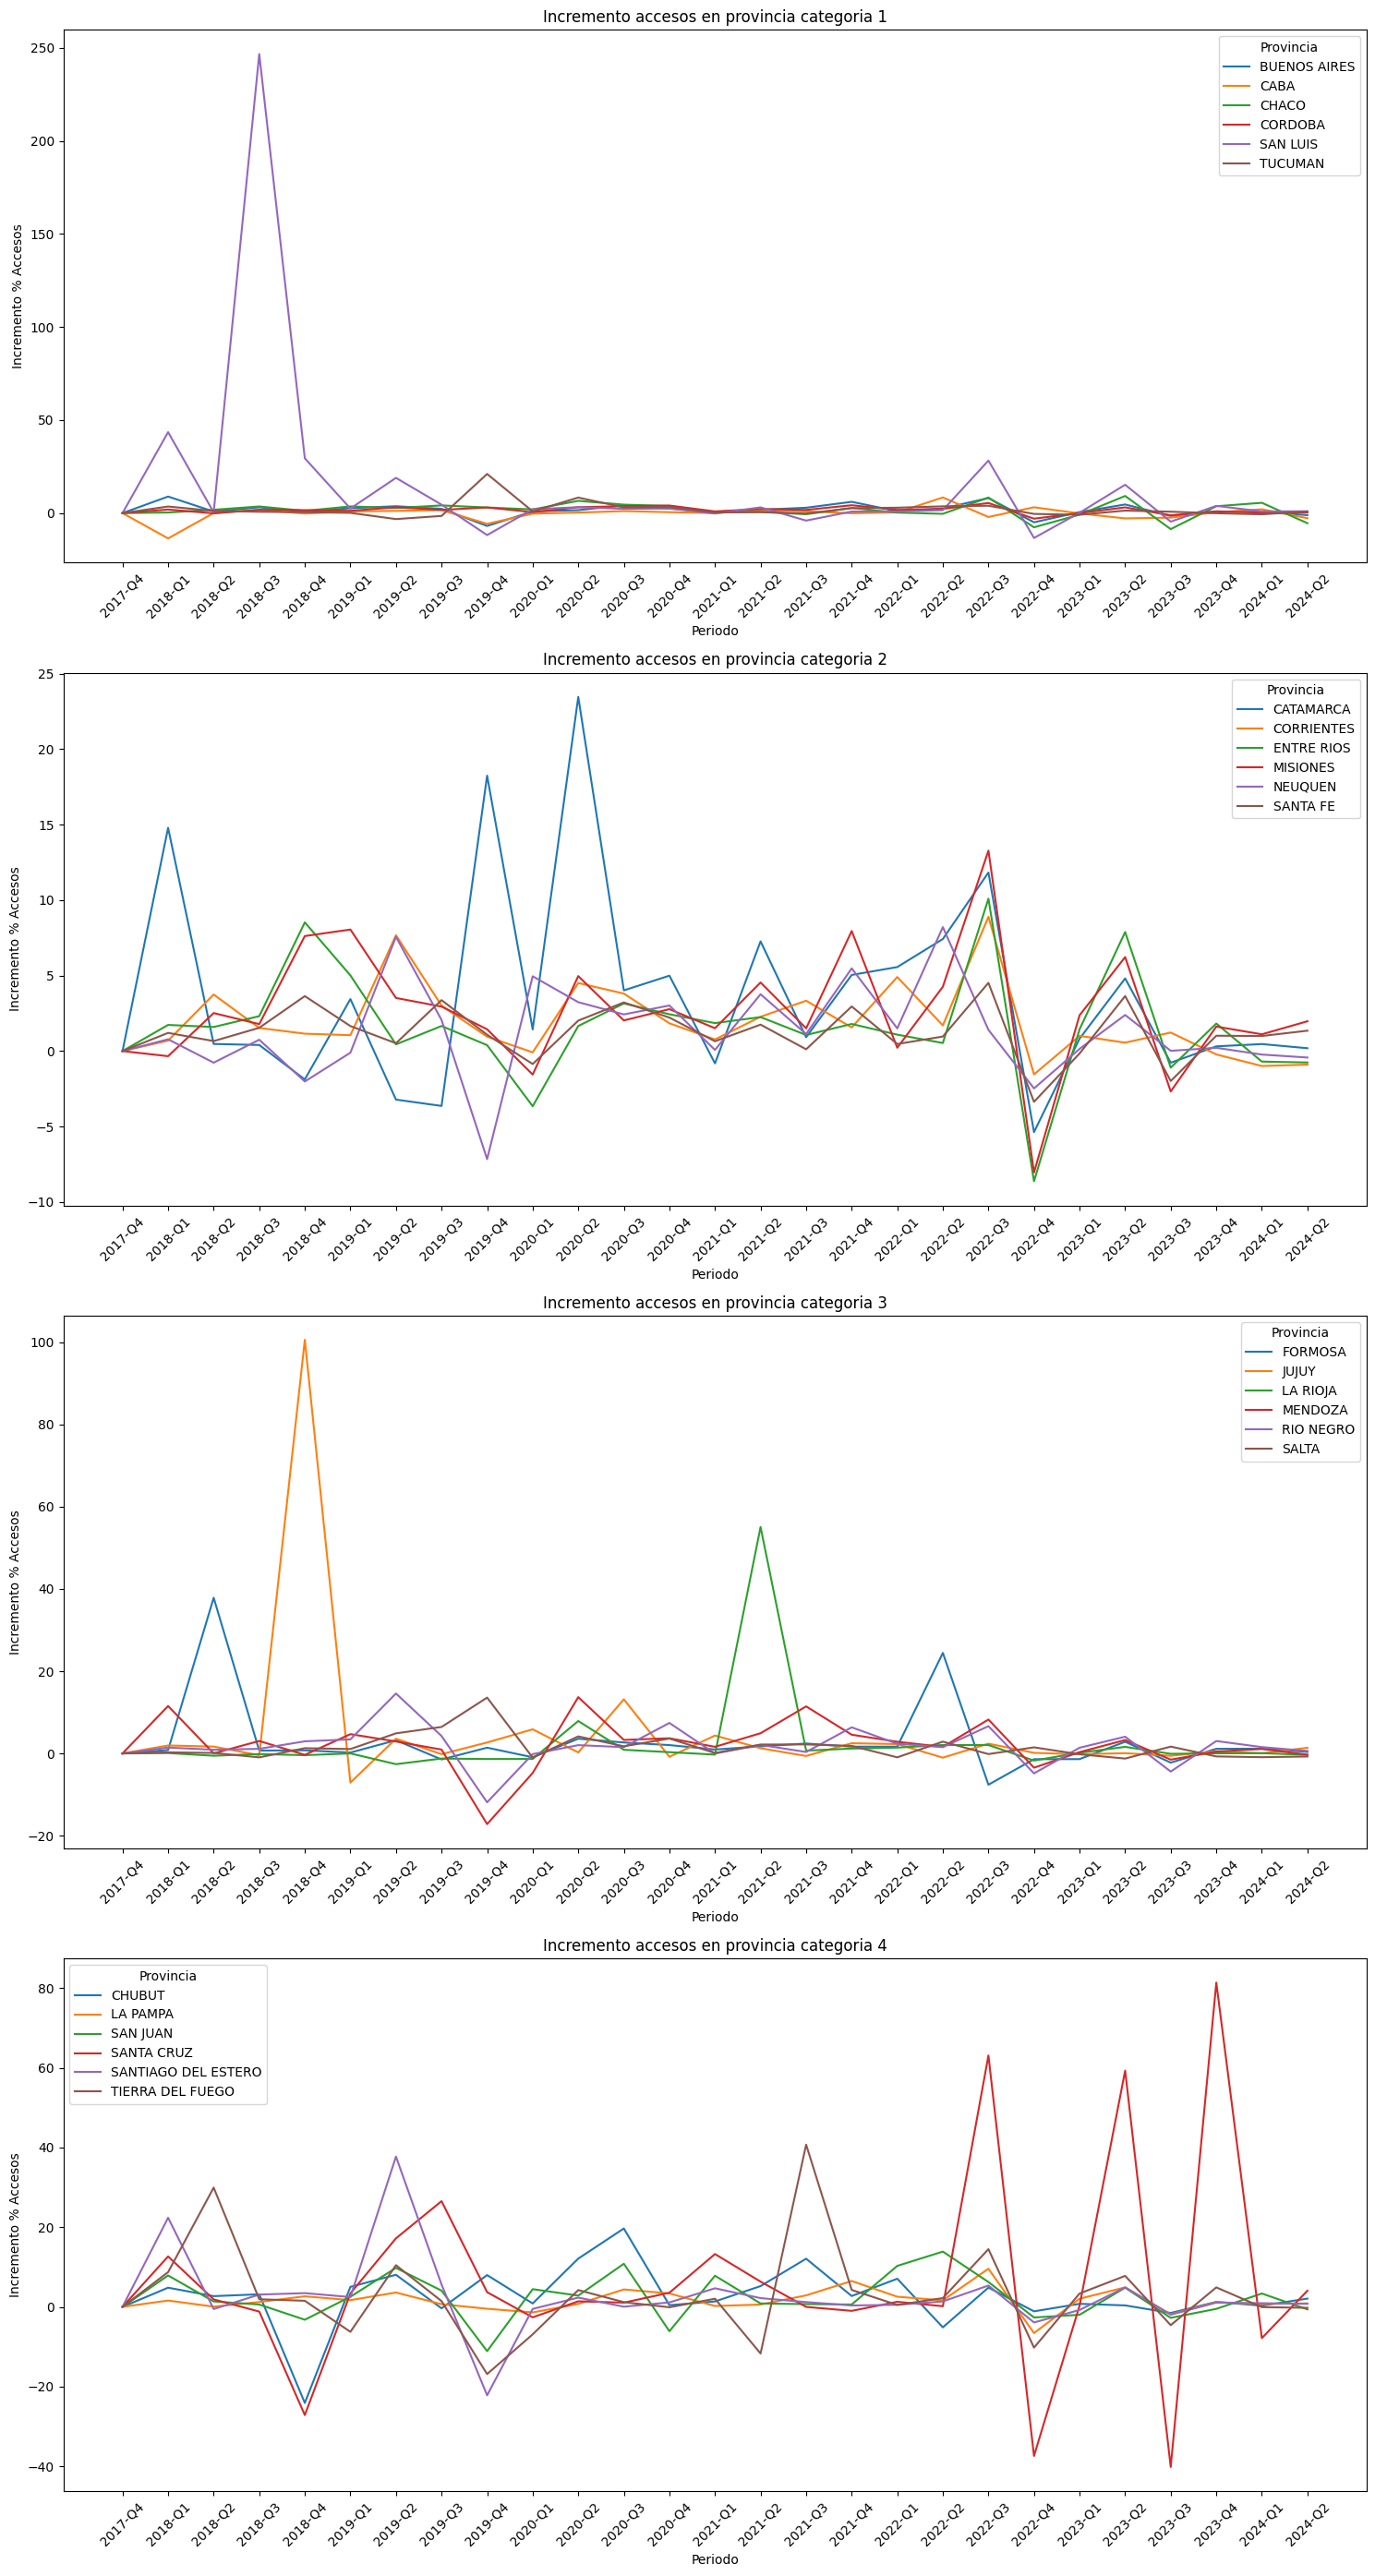

In [408]:
#Graficamos
lista_categorias = list(category_df["Categoria"].unique())
fig, axes = plt.subplots(nrows=len(lista_categorias), ncols=1, figsize=(15, 7 * len(lista_categorias)))

for i, categoria in enumerate(lista_categorias):
    mask = evol_enlaces_df["Categoria"] == categoria
    plot_df = evol_enlaces_df[mask]

    sns.lineplot(data=plot_df, x="Periodo", y="Incremento % Accesos", hue="Provincia", ax=axes[i])

    axes[i].set_title(f"Incremento accesos en provincia categoria {categoria}")
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [417]:
evol_enlaces_df[evol_enlaces_df["Incremento % Accesos"]>100]

,Provincia,Año,Trimestre,Accesos,Desfase_Accesos,Incremento Accesos,Incremento % Accesos,Periodo,Categoria
247,JUJUY,2018,4,90133,44935.0,45198.0,100.585290,2018-Q4,3
489,SAN LUIS,2018,3,74421,21468.0,52953.0,246.660145,2018-Q3,1


Observaciones:

- Categoria 1:
    - Incremento explosivo en el periodo 2018-Q3 para la provincia SAN LUIS.
    - Lo demas, se ve visualmente "normal", aunque posiblemente tengamos un problema de visualización por el outlier.
- Categoria 2:
    - Se ve un poco más caótica la evolución de incremento porcentual.
    - Ciertos picos para le region de Neuquen. 
    - Periodo de caída en el 2022-Q4 y posterior mejor en 2023-Q1 y 2023-Q3
- Categoria 3:
    - Tenemos picos de 100% para la region de JUYJUY y de mas del 50% para la region de RIOJA.
    - Lo demás parecen ser valores relativamente estables.
- Categoria 4:
    - Vemos comportamiento muy variante en la región de SANTA CRUZ
    - Las demas regiones tienen valores relativamente estables.

## Definicion de KPI
En vista de lo observado nos interesa definir un KPI que pueda resumir.


- Incremento Porcentual Promedio = Suma del Incremento Porcentual / Cantidad Total de Periodos
    - Nos ayuda a calcular que tan rápido se encuentra creciendo una provincia con respecto a otra en términos de cantidad de enlaces.

- Consistencia de % incremental = Desviación Estandar de Incremento porcentual
    - Define que tan estable es el crecimiento de una región. y/o si tiene picos muy pronunciados.

​
 


### Incremento Porcentual Promedio de enlaces

In [430]:
# Eliminamos el primero periodo, ya que posee un incremento porcentual de 0, sin sentido, ya que no tenemos data del periodo previo.
data_df = evol_enlaces_df[evol_enlaces_df["Incremento % Accesos"]!=0]
data_df.head()

,Provincia,Año,Trimestre,Accesos,Desfase_Accesos,Incremento Accesos,Incremento % Accesos,Periodo,Categoria
1,BUENOS AIRES,2018,1,3471700,3188332.0,283368.0,8.887657,2018-Q1,1
2,BUENOS AIRES,2018,2,3500699,3471700.0,28999.0,0.835297,2018-Q2,1
3,BUENOS AIRES,2018,3,3610277,3500699.0,109578.0,3.130175,2018-Q3,1
4,BUENOS AIRES,2018,4,3636606,3610277.0,26329.0,0.729279,2018-Q4,1
5,BUENOS AIRES,2019,1,3732709,3636606.0,96103.0,2.642656,2019-Q1,1


In [442]:
# Realizamos el cálculo de la media con una funcion de agregacion.
incremento_porcentual_promedio_df = data_df.groupby(by=["Provincia","Categoria"]).agg(func={"Incremento % Accesos" : "mean"}).reset_index()
# Ordenamos valores para una mejor visualización.
incremento_porcentual_promedio_df.sort_values(by=["Incremento % Accesos"], ascending=False)

,Provincia,Categoria,Incremento % Accesos
18,SAN LUIS,1,14.522439
19,SANTA CRUZ,4,7.039651
9,JUJUY,3,5.139895
2,CATAMARCA,2,3.853838
22,TIERRA DEL FUEGO,4,3.177077
8,FORMOSA,3,2.942086
13,MISIONES,2,2.754030
21,SANTIAGO DEL ESTERO,4,2.751250
4,CHUBUT,4,2.711823
17,SAN JUAN,4,2.454368


Observaciones:

- Podemos observar de manera rápida que regiones han tenido un mejor crecimiento en los últimos años: SAN LUIS, SANTA CRUZ, JUJUY.
- Las localidades con menor crecimiento medio: CABA, SANTA FE, NEUQUEN, SALTA
- Particularmente CABA parece un ejemplo raro, ya que la caída se debe a los datos del primer periodo. No sabemos si estos datos son correctos.

## Velocidad media por region por trimestre
Vamos a calcular la velocidad media por región por trimestre y evaluar la evolución para cada región por separado.

In [456]:
velocidad_df = Hoja_2.copy()

In [464]:
# Creamos función de agregación para calcular la velocidad media, por periodo.

# Calculamos la columna de  velocidad * accesos
velocidad_df["velocidad x accesos"] = velocidad_df["Velocidad"]*velocidad_df["Accesos"]
# Creamos una funcion de agregación sumando accesos y velocidad x accesos.
velocidad_df_agg = velocidad_df.groupby(by=["Provincia", "Año", "Trimestre"]).agg(func={"Accesos":"sum", "velocidad x accesos" : "sum"}).reset_index()

# Calculamos una nueva columna con la velocidad media.
velocidad_df_agg["Velocidad_media(Mbps)"] = velocidad_df_agg["velocidad x accesos"]/velocidad_df_agg["Accesos"]

# Mostramos el dset
velocidad_df_agg

,Provincia,Año,Trimestre,Accesos,velocidad x accesos,Velocidad_media(Mbps)
0,BUENOS AIRES,2017,4,3188332,4.114651e+07,12.905339
1,BUENOS AIRES,2018,1,3471700,4.945306e+07,14.244624
2,BUENOS AIRES,2018,2,3500699,5.110328e+07,14.598022
3,BUENOS AIRES,2018,3,3610277,6.009036e+07,16.644253
4,BUENOS AIRES,2018,4,3636606,6.280051e+07,17.268989
...,...,...,...,...,...,...
643,TUCUMAN,2023,2,264595,2.827113e+07,106.846809
644,TUCUMAN,2023,3,266557,2.722369e+07,102.130828
645,TUCUMAN,2023,4,266335,2.796225e+07,104.989031
646,TUCUMAN,2024,1,264595,2.827113e+07,106.846809


Vamos a calcular tambien el incremento por periodo, y el incremento porcentual por periodo.


In [477]:
# Agregamos una velocidad nueva columna con los valores desfasados.
velocidad_df_agg["Velocidad_media_previa"] = velocidad_df_agg.groupby(by="Provincia")["Velocidad_media(Mbps)"].shift(1)

# Calculamos el incremento neto en una nueva columna
velocidad_df_agg["Incremento Velocidad (Mbps)"] = velocidad_df_agg["Velocidad_media(Mbps)"] - velocidad_df_agg["Velocidad_media_previa"]

# Calculamos el incremento porcentual
velocidad_df_agg["Incremento Velocidad %"] = velocidad_df_agg["Incremento Velocidad (Mbps)"] / velocidad_df_agg["Velocidad_media_previa"] * 100

# Agregamos una columna periodo:
velocidad_df_agg["Periodo"] = velocidad_df_agg["Año"].astype(str) + "-Q" + velocidad_df_agg["Trimestre"].astype(str) 

# Agregamos también la categoría de las regiones para mejor visibilidad.
velocidad_df_agg_cat = pd.merge(velocidad_df_agg, category_df, on="Provincia")

In [478]:
velocidad_df_agg_cat

,Provincia,Año,Trimestre,Accesos,velocidad x accesos,Velocidad_media(Mbps),Velocidad_media_previa,Incremento Velocidad (Mbps),Incremento Velocidad %,Periodo,Categoria
0,BUENOS AIRES,2017,4,3188332,4.114651e+07,12.905339,NaN,NaN,NaN,2017-Q4,1
1,BUENOS AIRES,2018,1,3471700,4.945306e+07,14.244624,12.905339,1.339285,10.377756,2018-Q1,1
2,BUENOS AIRES,2018,2,3500699,5.110328e+07,14.598022,14.244624,0.353398,2.480919,2018-Q2,1
3,BUENOS AIRES,2018,3,3610277,6.009036e+07,16.644253,14.598022,2.046232,14.017185,2018-Q3,1
4,BUENOS AIRES,2018,4,3636606,6.280051e+07,17.268989,16.644253,0.624736,3.753463,2018-Q4,1
...,...,...,...,...,...,...,...,...,...,...,...
643,TUCUMAN,2023,2,264595,2.827113e+07,106.846809,93.593569,13.253240,14.160418,2023-Q2,1
644,TUCUMAN,2023,3,266557,2.722369e+07,102.130828,106.846809,-4.715981,-4.413778,2023-Q3,1
645,TUCUMAN,2023,4,266335,2.796225e+07,104.989031,102.130828,2.858203,2.798570,2023-Q4,1
646,TUCUMAN,2024,1,264595,2.827113e+07,106.846809,104.989031,1.857778,1.769498,2024-Q1,1


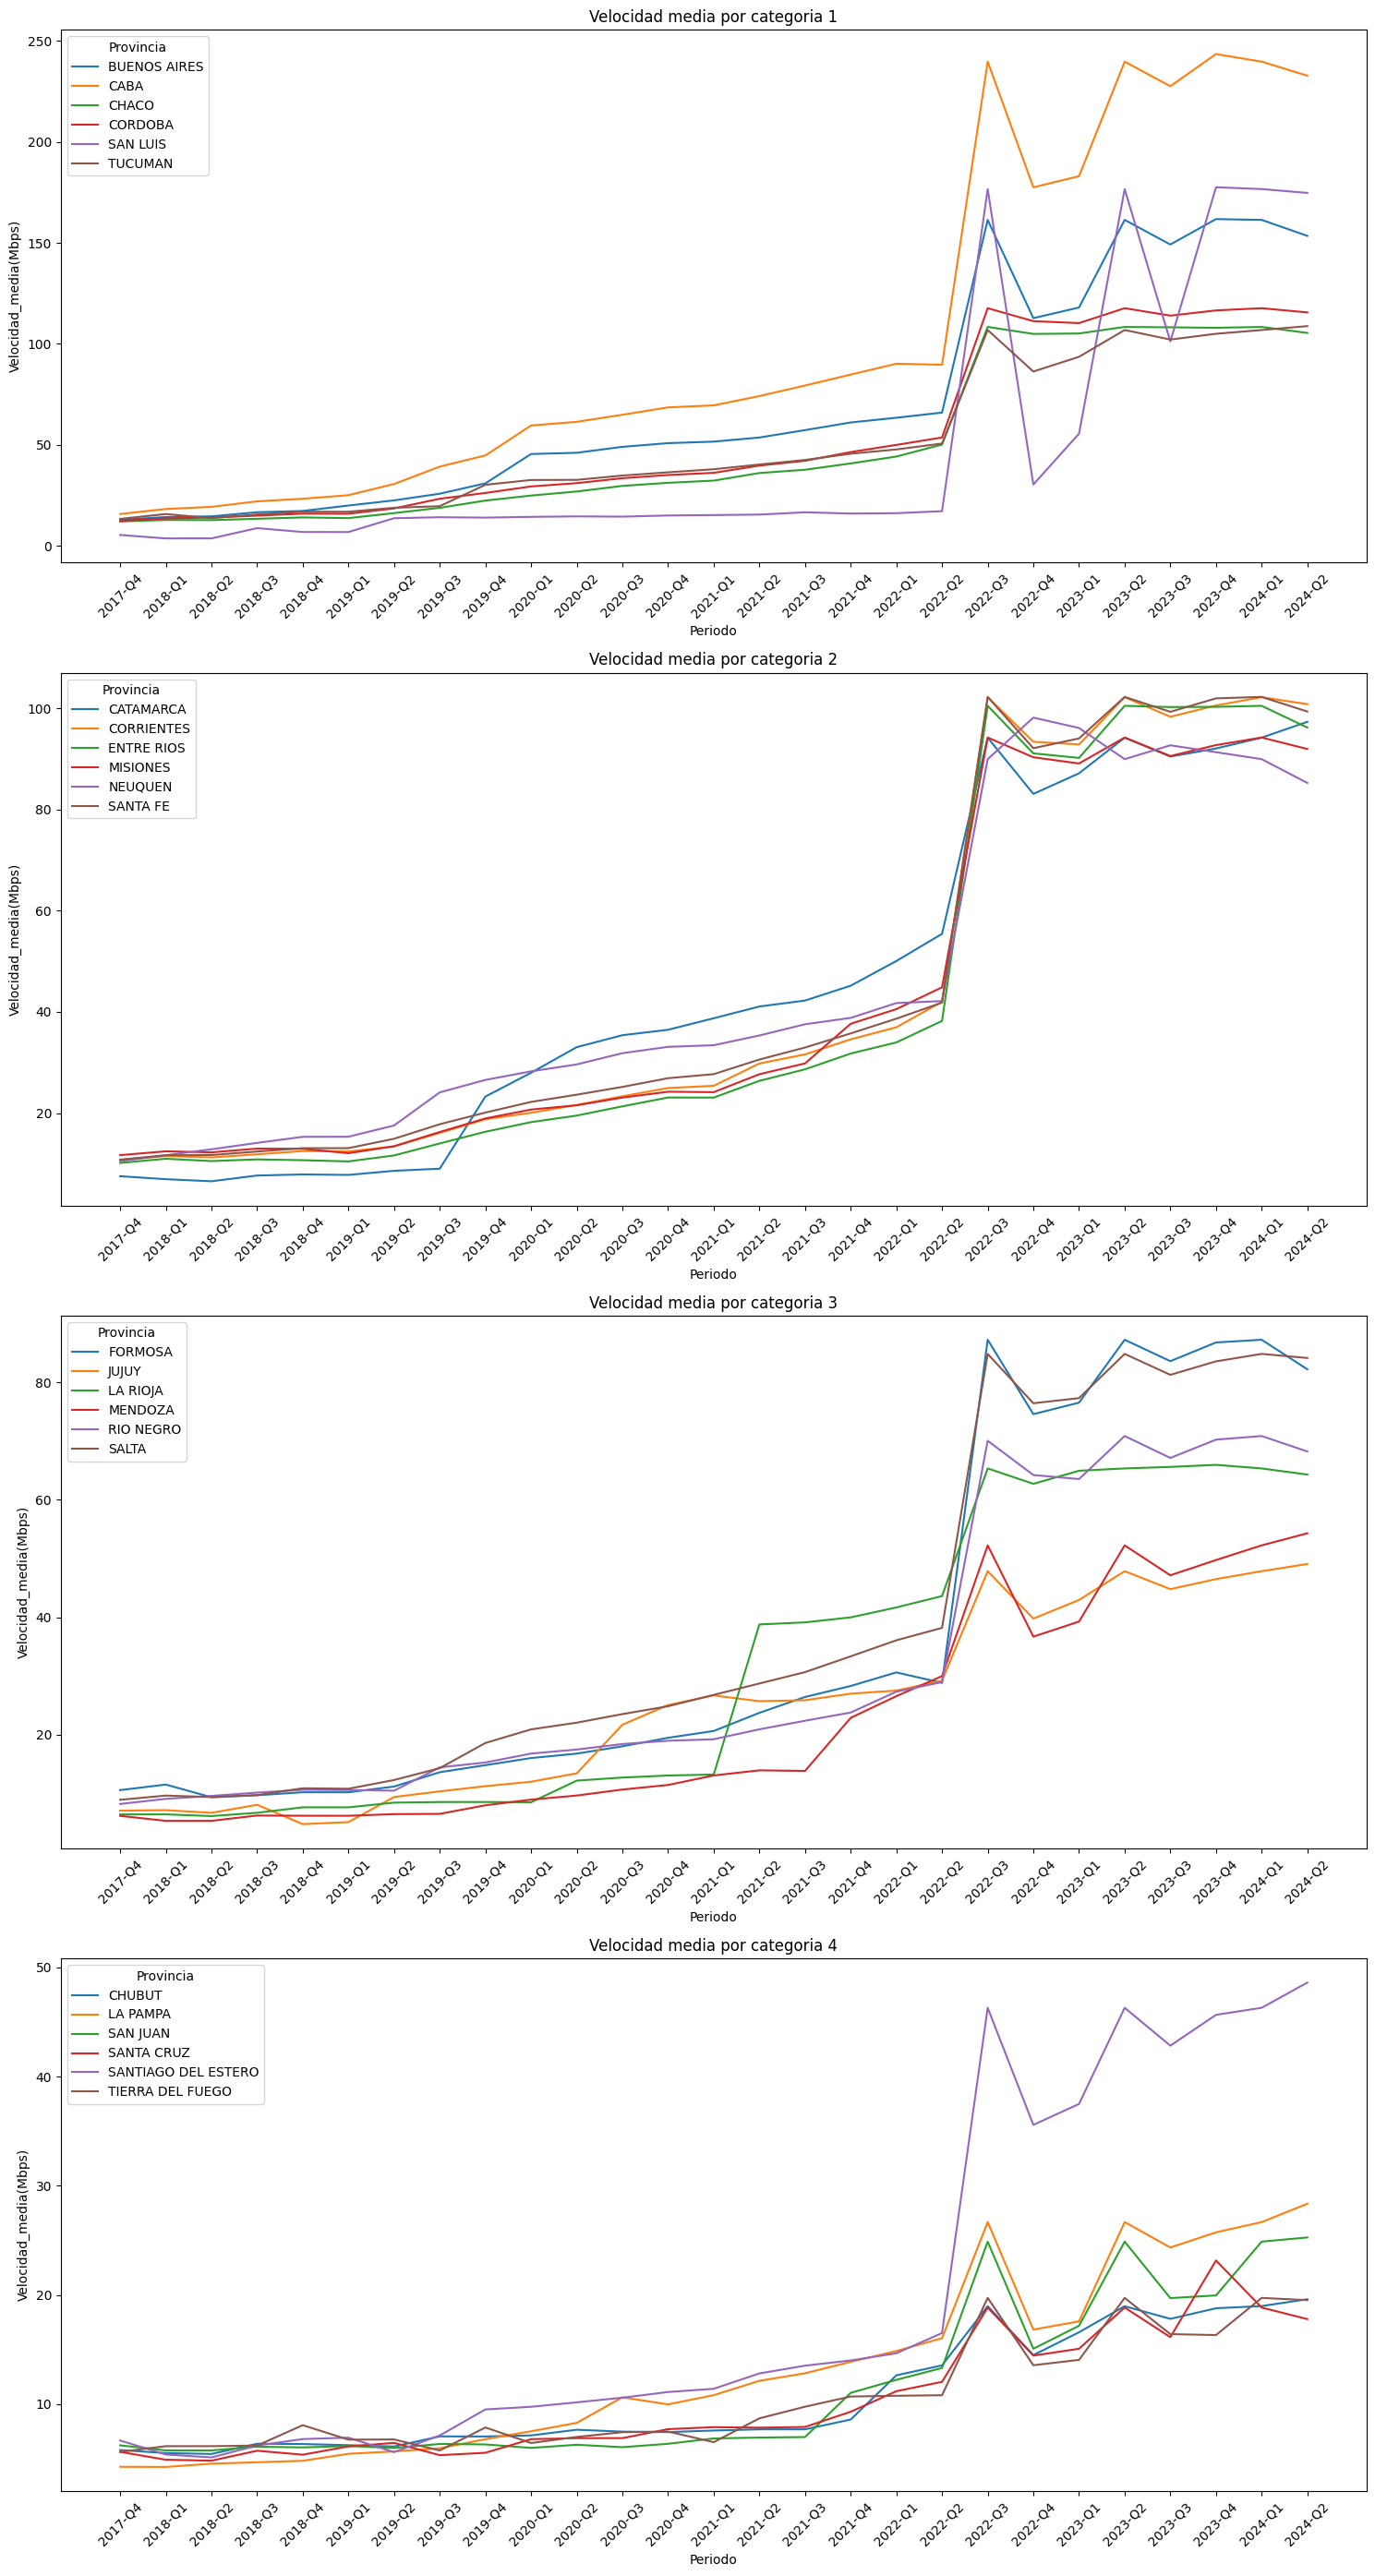

In [ ]:
#Graficamos
lista_categorias = list(category_df["Categoria"].unique())
fig, axes = plt.subplots(nrows=len(lista_categorias), ncols=1, figsize=(15, 7 * len(lista_categorias)))

for i, categoria in enumerate(lista_categorias):
    mask = velocidad_df_agg_cat["Categoria"] == categoria
    plot_df = velocidad_df_agg_cat[mask]

    sns.lineplot(data=plot_df, x="Periodo", y="Velocidad_media(Mbps)", hue="Provincia", ax=axes[i])

    axes[i].set_title(f"Velocidad media por categoria {categoria}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Observaciones:

- Detectamos que en general, hay un crecimiento grande en las velocidades a partir del 2022-Q3. Tras lo cual hay cierta estabilidad en la mayoria de los casos.

- Categoria 1: Observamos que todas las velocidades tienden a estabilizarse por encima de 100
- Categoria 2: Rangos finales entre 100 y 80
- Categoria 3: rangos variados entre 40 y 80
- Categoria 4: Vemos un outlier , Y los demás tienen una velocidad media de 30 megas. 

### Nuevo KPI: Índice de Prioridad por Incremento de Velocidad Media

Deseamos una forma de medir tanto el incremento de velocidad como la consistencia de este incremento a lo largo de los últimos años. 
Definimos: 

Índice de Prioridad por Incremento de Velocidad Media =  Incremento Porcentual Promedio de Velocidad / Consistencia Porcentual de Incremento de Velocidad

Donde:
- Incremento Porcentual Promedio de Velocidad: Define que tanto aumenta la velocidad por periodo.
- Consistencia Porcentual de Incremento de Velocidad: Define que tan consistente es esta variación. 


De acuerdo a las gráficas observadas, vamos a tomar como punto de partida el periodo 2022-Q3.

In [506]:
# filtramos los periodos previos al 2022-Q3
mask = (velocidad_df_agg_cat["Año"]>2021) & (velocidad_df_agg_cat["Periodo"]!="2022-Q1") & (velocidad_df_agg_cat["Periodo"]!="2022-Q2") & (velocidad_df_agg_cat["Periodo"]!="2022-Q3")
velocidad_df_agg_cat_recent = velocidad_df_agg_cat[mask]
velocidad_df_agg_cat_recent.head()

,Provincia,Año,Trimestre,Accesos,velocidad x accesos,Velocidad_media(Mbps),Velocidad_media_previa,Incremento Velocidad (Mbps),Incremento Velocidad %,Periodo,Categoria
20,BUENOS AIRES,2022,4,4794665,5.404495e+08,112.718925,161.366490,-48.647565,-30.147253,2022-Q4,1
21,BUENOS AIRES,2023,1,4820928,5.688240e+08,117.990566,112.718925,5.271641,4.676802,2023-Q1,1
22,BUENOS AIRES,2023,2,5044503,8.140219e+08,161.368116,117.990566,43.377550,36.763575,2023-Q2,1
23,BUENOS AIRES,2023,3,4968237,7.411903e+08,149.185780,161.368116,-12.182336,-7.549407,2023-Q3,1
24,BUENOS AIRES,2023,4,5011620,8.107082e+08,161.765693,149.185780,12.579912,8.432380,2023-Q4,1


In [507]:
# Calculamos los kpi con funciones de agregacion
indice_prioridad_df = velocidad_df_agg_cat_recent.groupby(by=["Provincia", "Categoria"]).agg(
    promedio_incremento_velocidad=("Incremento Velocidad %", "mean"),
    consistencia_incremento_velocidad=("Incremento Velocidad %", "std"),
    velocidad_media = ("Velocidad_media(Mbps)", "mean"),
).reset_index()

# Calculamos el KPI mencionado
indice_prioridad_df["indice_prioridad_velocidad_media"] = indice_prioridad_df["promedio_incremento_velocidad"] / indice_prioridad_df["consistencia_incremento_velocidad"]

indice_prioridad_df = indice_prioridad_df.sort_values(by=["Categoria", "indice_prioridad_velocidad_media"])

indice_prioridad_df

,Provincia,Categoria,promedio_incremento_velocidad,consistencia_incremento_velocidad,velocidad_media,indice_prioridad_velocidad_media
3,CHACO,1,-0.377222,2.104928,106.908983,-0.179209
5,CORDOBA,1,-0.189243,3.955111,114.701161,-0.047848
1,CABA,1,0.802236,16.952771,220.528160,0.047322
0,BUENOS AIRES,1,1.003334,20.114279,145.407300,0.049882
23,TUCUMAN,1,0.764417,10.578929,101.355842,0.072258
18,SAN LUIS,1,35.608689,99.932734,127.513746,0.356327
14,NEUQUEN,2,-0.647492,5.271296,91.909528,-0.122834
13,MISIONES,2,-0.289497,3.665558,91.864826,-0.078978
7,ENTRE RIOS,2,-0.456543,6.264189,96.988452,-0.072881
20,SANTA FE,2,-0.262445,5.798079,98.742914,-0.045264


<Axes: xlabel='indice_prioridad_velocidad_media'>

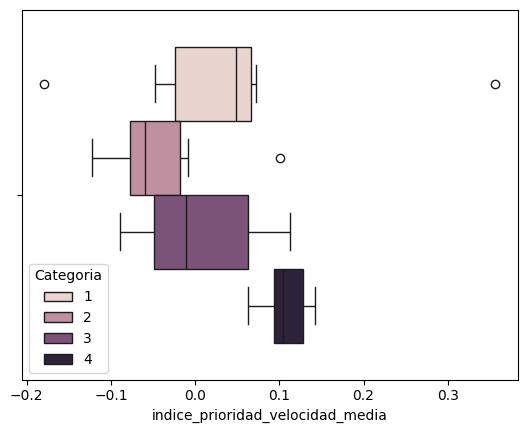

In [510]:
sns.boxplot(data=indice_prioridad_df, x="indice_prioridad_velocidad_media", hue="Categoria")

Observaciones:

Vemos los siguientes outliers:

- Cat1: SAN LUIS aparenta tener un mejor índice. Vemos que su velocidad media final es buena, sin embargo, aparentemente tuvo periodos de decaida, con mucha inestabilidad. 
- Pendiente revisar INSIGHTS

# Velocidad % por prov
Un dataset que indica la velocidad media por periodo por provincia
Previamente habiamos calculado este valor en el dataset anterior. Vamos a hacer un cruce para validar

In [514]:
# Cargamos el dataset yu visualizamos
mean_speed_df = file["Velocidad % por prov"]
mean_speed_df

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.410000
1,2024,2,Capital Federal,233.010000
2,2024,2,Catamarca,97.380000
3,2024,2,Chaco,107.760000
4,2024,2,Chubut,21.670000
...,...,...,...,...
1003,2014,1,Santa Cruz,3.315991
1004,2014,1,Santa Fe,3.147407
1005,2014,1,Santiago Del Estero,2.949472
1006,2014,1,Tierra Del Fuego,3.446888


In [ ]:
# sin nulos
mean_speed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [ ]:
# sin valores fuera de lo normal
mean_speed_df.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,1008.000000,1008.000000,1008.000000
mean,2018.761905,2.452381,24.720245
std,3.039439,1.117574,33.660764
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.000000,4.866698
50%,2019.000000,2.000000,10.089315
75%,2021.000000,3.000000,29.875292
max,2024.000000,4.000000,234.440000


In [524]:
# Los nombres estan en minúsculas. Figuran las 24 provincias. CABA figura como 'Capital Federal'
mean_speed_df["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [531]:
# Convertimos los valores a Mayusculas, sin tilde, y cambiamos Capital Federal por CABA.

mean_speed_df["Provincia"] = mean_speed_df["Provincia"].apply(str.upper)
mean_speed_df["Provincia"] = mean_speed_df["Provincia"].replace("CAPITAL FEDERAL", "CABA")

replace_dict = {"Á" : "A", "É" : "E", "Í" : "I", "Ó" : "O", "Ú": "U"}
for key, value in replace_dict.items():
    mean_speed_df["Provincia"] = mean_speed_df["Provincia"].apply(str.replace, args=(key, value))

mean_speed_df["Provincia"].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [535]:
# Agregamos las columnas Categoria y Periodo.
mean_speed_df = pd.merge(mean_speed_df, category_df, on="Provincia")

In [537]:
mean_speed_df["Periodo"] = mean_speed_df["Año"].astype(str) + "-Q" + mean_speed_df["Trimestre"].astype(str)
mean_speed_df

,Año,Trimestre,Provincia,Mbps (Media de bajada),Categoria,Periodo
0,2024,2,BUENOS AIRES,157.410000,1,2024-Q2
1,2024,2,CABA,233.010000,1,2024-Q2
2,2024,2,CATAMARCA,97.380000,2,2024-Q2
3,2024,2,CHACO,107.760000,1,2024-Q2
4,2024,2,CHUBUT,21.670000,4,2024-Q2
...,...,...,...,...,...,...
1003,2014,1,SANTA CRUZ,3.315991,4,2014-Q1
1004,2014,1,SANTA FE,3.147407,2,2014-Q1
1005,2014,1,SANTIAGO DEL ESTERO,2.949472,4,2014-Q1
1006,2014,1,TIERRA DEL FUEGO,3.446888,4,2014-Q1


In [540]:
# Comparamos los valores con nuestro dataset calculado previamente.
comparison_df = pd.merge(mean_speed_df, velocidad_df_agg_cat[["Provincia", "Periodo", "Velocidad_media(Mbps)"]], on=["Provincia", "Periodo"]).sort_values(by=["Año", "Trimestre"])

In [542]:
# Creamos una columna diferencia para visualizar el error.
comparison_df["Dif"] = comparison_df["Mbps (Media de bajada)"] - comparison_df["Velocidad_media(Mbps)"]

In [ ]:
# Vemos una diferencia máxima de 13. El Quartil 3 es de 0.78, un valor pequeño. lo que indica que existirían pocos errores.
comparison_df.describe()

,Año,Trimestre,Mbps (Media de bajada),Categoria,Velocidad_media(Mbps),Dif
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,2020.629630,2.481481,36.005347,2.500000,37.671765,-1.666418
std,1.985695,1.135202,37.487874,1.118898,40.745203,12.058865
min,2017.000000,1.000000,3.975819,1.000000,3.669100,-157.291097
25%,2019.000000,1.000000,10.809958,1.750000,10.819029,-0.451718
50%,2021.000000,2.000000,21.652629,2.500000,20.095499,-0.090853
75%,2022.000000,4.000000,44.942500,3.250000,47.284000,0.787848
max,2024.000000,4.000000,234.440000,4.000000,243.466719,13.614274


In [545]:
comparison_df[comparison_df["Dif"]>5]

,Año,Trimestre,Provincia,Mbps (Media de bajada),Categoria,Periodo,Velocidad_media(Mbps),Dif
498,2019,2,SAN LUIS,19.875973,1,2019-Q2,13.676494,6.199479
474,2019,3,SAN LUIS,19.743827,1,2019-Q3,14.165903,5.577924
450,2019,4,SAN LUIS,20.690353,1,2019-Q4,13.969723,6.720631
426,2020,1,SAN LUIS,20.989380,1,2020-Q1,14.347760,6.641620
402,2020,2,SAN LUIS,21.020627,1,2020-Q2,14.589922,6.430705
378,2020,3,SAN LUIS,20.849928,1,2020-Q3,14.455550,6.394378
354,2020,4,SAN LUIS,21.252954,1,2020-Q4,15.020859,6.232095
330,2021,1,SAN LUIS,21.594380,1,2021-Q1,15.234212,6.360168
306,2021,2,SAN LUIS,21.661890,1,2021-Q2,15.473918,6.187972
282,2021,3,SAN LUIS,21.698707,1,2021-Q3,16.609416,5.089291


Si bien los errores parecen ser pequeños, en algunos casos pueden ser considerables  ya que representan un porcentaje grande de un periodo determinado.
Así mismo, en todos los casos la diferencia es positiva, lo que indica que posiblemente hay enlaces que no se contabilizan o no se mostraron en el dataset previo por algún motivo. 
Por tal motivo, consideraremos recalcular los KPÍs basadas en esta información.

# Accesos Tecnologia por Localidad
Se trata de un dataset que muestra la cantidad de accesos por tecnología en cada localidad.

Posiblemente podamos encontrar alguna relación entre las tecnologías predominantes y el ancho de banda medio de cada region

In [ ]:
# Cargamos datos
tecnologias_df = file["Accesos_tecnologia_localidad"]

In [ ]:
# Observamos nulos en la columna accesos
tecnologias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [ ]:
# Observamos los datos Nulos.
tecnologias_df[tecnologias_df["Accesos"].isnull()]

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
3755,CORRIENTES,Ituzaingó,Colonia Liebig's,Otros,18084010,NaN
4101,ENTRE RIOS,Tala,Rosario del Tala,Otros,30091100,NaN
5744,SALTA,Cafayate,Tolombón,Otros,66021020,NaN
6005,SALTA,San Carlos,Animaná,Otros,66154020,NaN
6010,SALTA,San Carlos,San Carlos,Otros,66154040,NaN
7372,SANTIAGO DEL ESTERO,Choya,Frías,Otros,86063040,NaN


In [557]:
# Reemplazamos por 0
tecnologias_df["Accesos"] = tecnologias_df["Accesos"].fillna(0)

In [ ]:
# Observamos la columna Provincias, con valores correctos. 
tecnologias_df["Provincia"].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [563]:
#Observamos falta de normalización en la columna Tecnologia
tecnologias_df["Tecnologia"].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'Otros', 'DIAL UP', 'OTROS', 'WIMAX', 'Cablemodem'], dtype=object)

In [568]:
#normalizamos.
tecnologias_df["Tecnologia"] = tecnologias_df["Tecnologia"].str.upper()
tecnologias_df["Tecnologia"].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX'], dtype=object)

In [575]:
# Revisamos la cantidad de valores por cada tipo de tecnología en general.
total_tecnologias = tecnologias_df.groupby(by="Tecnologia").agg(Accesos_totales = ("Accesos", "sum")).sort_values(by="Accesos_totales", ascending=False).reset_index()
total_tecnologias

,Tecnologia,Accesos_totales
0,CABLEMODEM,5867504.0
1,FIBRA OPTICA,4169958.0
2,ADSL,733491.0
3,WIRELESS,593197.0
4,OTROS,174996.0
5,DIAL UP,11793.0
6,SATELITAL,2930.0
7,WIMAX,2238.0


In [606]:
# Vamos a hacer una agregación de de tecnologías por Provincia
tecnologias_sum_df = tecnologias_df.groupby(by=["Provincia", "Tecnologia"]).agg(Accesos=("Accesos", "sum")).reset_index()
tecnologias_sum_df

,Provincia,Tecnologia,Accesos
0,BUENOS AIRES,ADSL,214055.0
1,BUENOS AIRES,CABLEMODEM,2722466.0
2,BUENOS AIRES,DIAL UP,5900.0
3,BUENOS AIRES,FIBRA OPTICA,1849476.0
4,BUENOS AIRES,OTROS,56102.0
...,...,...,...
165,TUCUMAN,DIAL UP,27.0
166,TUCUMAN,FIBRA OPTICA,213753.0
167,TUCUMAN,OTROS,454.0
168,TUCUMAN,SATELITAL,37.0


In [ ]:
# Hacemos un reshape
accesos_tecnologia_provincia = tecnologias_sum_df.pivot(index="Provincia", columns="Tecnologia", values="Accesos").reset_index().fillna(0)
# Agregamos la columna totales:
accesos_tecnologia_provincia["Total"] = accesos_tecnologia_provincia.iloc[:, 1:].sum(axis=1)
# Mostramos el dataset
accesos_tecnologia_provincia

Tecnologia,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total
0,BUENOS AIRES,214055.0,2722466.0,5900.0,1849476.0,56102.0,1061.0,1682.0,138638.0,4989380.0
1,CABA,54102.0,1144781.0,2050.0,230402.0,27704.0,67.0,0.0,4493.0,1463599.0
2,CATAMARCA,4951.0,10303.0,1.0,58355.0,1.0,79.0,0.0,1384.0,75074.0
3,CHACO,9448.0,57935.0,5.0,68944.0,2277.0,76.0,0.0,8407.0,147092.0
4,CHUBUT,25955.0,80704.0,857.0,26516.0,8906.0,167.0,0.0,31118.0,174223.0
5,CORDOBA,93483.0,443091.0,63.0,477504.0,9305.0,95.0,71.0,62162.0,1085774.0
6,CORRIENTES,14849.0,86226.0,3.0,39792.0,5174.0,77.0,59.0,10295.0,156475.0
7,ENTRE RIOS,31335.0,158918.0,20.0,68540.0,11296.0,24.0,224.0,23954.0,294311.0
8,FORMOSA,8488.0,18768.0,0.0,18977.0,234.0,53.0,0.0,16430.0,62950.0
9,JUJUY,9509.0,51361.0,0.0,53492.0,1127.0,89.0,0.0,4106.0,119684.0


## KPI: Ratio de adopción de tecnologia
Con la información obtenida podemos calcular el Ratio de adopción de tecnologia para cada tecnologia en cada region:
Lo definiremos como:

Ratio de Adopcion (Tecnologia) = Total Accesos (Tecnologia) / Total Accesos (Region)

La idea es explicar inicialmente que tanto predomina cierta tecnologia en cada región. Y posteriormente verificar si esto puede explicar en cierta forma el BW medio.

In [638]:
# Calculamos el kpi
ratio_accesos_tecnologia = accesos_tecnologia_provincia.iloc[:, 1:].apply(lambda row: row / row["Total"], axis=1)
ratio_accesos_tecnologia = pd.merge(accesos_tecnologia_provincia["Provincia"], ratio_accesos_tecnologia, left_index=True, right_index=True)
ratio_accesos_tecnologia.drop(columns="Total", inplace=True)
ratio_accesos_tecnologia

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,BUENOS AIRES,0.042902,0.545652,0.001183,0.370683,0.011244,0.000213,0.000337,0.027787
1,CABA,0.036965,0.782168,0.001401,0.157422,0.018929,0.000046,0.000000,0.003070
2,CATAMARCA,0.065948,0.137238,0.000013,0.777300,0.000013,0.001052,0.000000,0.018435
3,CHACO,0.064232,0.393869,0.000034,0.468713,0.015480,0.000517,0.000000,0.057155
4,CHUBUT,0.148976,0.463222,0.004919,0.152196,0.051118,0.000959,0.000000,0.178610
5,CORDOBA,0.086098,0.408088,0.000058,0.439782,0.008570,0.000087,0.000065,0.057251
6,CORRIENTES,0.094897,0.551053,0.000019,0.254303,0.033066,0.000492,0.000377,0.065793
7,ENTRE RIOS,0.106469,0.539966,0.000068,0.232883,0.038381,0.000082,0.000761,0.081390
8,FORMOSA,0.134837,0.298141,0.000000,0.301461,0.003717,0.000842,0.000000,0.261001
9,JUJUY,0.079451,0.429138,0.000000,0.446944,0.009416,0.000744,0.000000,0.034307


In [ ]:
# datos de velocidad media en la actualidad. 
curr_mean_speed = mean_speed_df[mean_speed_df["Periodo"]=="2024-Q2"][["Provincia", "Mbps (Media de bajada)", "Categoria"]]
curr_mean_speed

,Provincia,Mbps (Media de bajada),Categoria
0,BUENOS AIRES,157.41,1
1,CABA,233.01,1
2,CATAMARCA,97.38,2
3,CHACO,107.76,1
4,CHUBUT,21.67,4
5,CORDOBA,117.39,1
6,CORRIENTES,104.26,2
7,ENTRE RIOS,100.98,2
8,FORMOSA,82.66,3
9,JUJUY,49.87,3


In [667]:
eval_df = pd.merge(ratio_accesos_tecnologia, curr_mean_speed, on= "Provincia")
eval_df

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Mbps (Media de bajada),Categoria
0,BUENOS AIRES,0.042902,0.545652,0.001183,0.370683,0.011244,0.000213,0.000337,0.027787,157.41,1
1,CABA,0.036965,0.782168,0.001401,0.157422,0.018929,0.000046,0.000000,0.003070,233.01,1
2,CATAMARCA,0.065948,0.137238,0.000013,0.777300,0.000013,0.001052,0.000000,0.018435,97.38,2
3,CHACO,0.064232,0.393869,0.000034,0.468713,0.015480,0.000517,0.000000,0.057155,107.76,1
4,CHUBUT,0.148976,0.463222,0.004919,0.152196,0.051118,0.000959,0.000000,0.178610,21.67,4
5,CORDOBA,0.086098,0.408088,0.000058,0.439782,0.008570,0.000087,0.000065,0.057251,117.39,1
6,CORRIENTES,0.094897,0.551053,0.000019,0.254303,0.033066,0.000492,0.000377,0.065793,104.26,2
7,ENTRE RIOS,0.106469,0.539966,0.000068,0.232883,0.038381,0.000082,0.000761,0.081390,100.98,2
8,FORMOSA,0.134837,0.298141,0.000000,0.301461,0.003717,0.000842,0.000000,0.261001,82.66,3
9,JUJUY,0.079451,0.429138,0.000000,0.446944,0.009416,0.000744,0.000000,0.034307,49.87,3


In [658]:
# Tratamos de explicar Mbps usando una regresion lineal.
from sklearn.linear_model import LinearRegression

X = eval_df[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']]

y = eval_df['Mbps (Media de bajada)']

model = LinearRegression()

model.fit(X, y)

print("Coef: " , model.coef_)
print("Intercepto: " ,model.intercept_)

Coef:  [   598.71495367   1101.59619546  -5587.21118987   1081.5084739
   1324.20506851 -42919.18890331  43252.86180937   1147.51359226]
Intercepto:  -946.4104681627538


In [659]:
# Evaluación de la regresión. Resultado bajo.
r2 = model.score(X, y)
print(r2)

0.400250846675156


In [672]:
# Calculamos los valores por categoria para una mejor visibilidad. 
adopcion_por_categoria = eval_df.drop(columns="Provincia").groupby(by="Categoria").agg('mean').reset_index()
adopcion_por_categoria

,Categoria,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Mbps (Media de bajada)
0,1,0.060100,0.410320,0.000637,0.409129,0.009395,0.000235,0.000067,0.110118,151.018333
1,2,0.101235,0.411168,0.000483,0.393679,0.019940,0.000473,0.000396,0.072627,99.720000
2,3,0.086265,0.393541,0.000914,0.392507,0.022191,0.000634,0.000000,0.103948,69.028333
3,4,0.101909,0.447715,0.002631,0.296554,0.024725,0.000677,0.000000,0.125788,30.583333


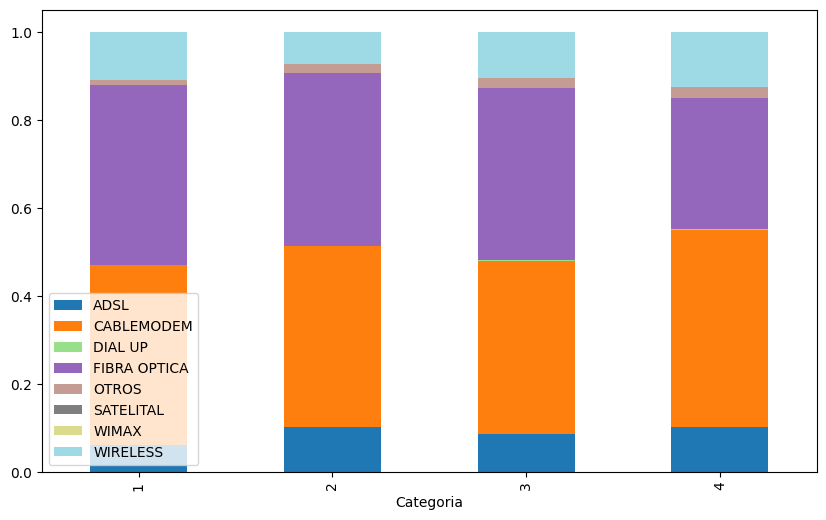

In [ ]:
# Creamos una gráfica apilada porcentual para visualizar la disposición.
adopcion_por_categoria.iloc[:,0:-1].set_index("Categoria").plot(kind="bar", stacked=True, figsize=(10, 6), cmap="tab20")
plt.show()

Observaciones:

- Se observa que en general, las tecnologías predominantes son: ADSL, CABLEMODEM, FIBRA OPTICA y WIRELESS. 
- Las regiones con menor BW Medio tienen mayor adopcion de ADSL, DIAL UP, SATELITAL y WIRELESS que otras regiones.
- La categoria 4 tiene una reduccion en adopcion de FIBRA OPTICA considerable.
- Aún sigue siendo dificil explicar en gran medida el BAJO BW de las regiones en de categoria 4. 

# Totales VMD

Se trata de un dataset simple con la evolución de la velocidad media de bajada total de los ultimos 10 años.
Talvez se pueda usar posteriormente para un resumen. 

In [685]:
total_vmd = file["Totales VMD"]
total_vmd

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.250000,Abr-Jun 2024
1,2024,1,139.150000,Ene-Mar 2024
2,2023,4,139.040000,Oct-Dic 2023
3,2023,3,129.670000,Jul-Sept 2023
4,2023,2,123.950000,Abr-Jun 2023
5,2023,1,110.500000,Ene-Mar 2023
6,2022,4,106.560000,Oct-Dic 2022
7,2022,3,62.460000,Jul-Sept 2022
8,2022,2,58.440000,Abr-Jun 2022
9,2022,1,55.110000,Ene-Mar 2022


# Totales Accesos Por Tecnología
Representa la evolución total de las tecnologias a nivel nacional

In [ ]:
# Cargamos el archivo.
totales_accesos_por_tecnologia = file["Totales Accesos Por Tecnología"]

In [691]:
# Modificamos la columna periodo para mejor entendimiento
totales_accesos_por_tecnologia["Periodo"] = totales_accesos_por_tecnologia["Año"].astype(str) + "-Q" + totales_accesos_por_tecnologia["Trimestre"].astype(str)
totales_accesos_por_tecnologia = totales_accesos_por_tecnologia.sort_values(by=["Año", "Trimestre"])
totales_accesos_por_tecnologia

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
41,2014,1,3697066,2407330,150323,70749,72930,6398398,2014-Q1
40,2014,2,3708882,2461670,149363,72405,72148,6464468,2014-Q2
39,2014,3,3714764,2569868,155494,85096,70049,6595271,2014-Q3
38,2014,4,3764038,2536219,149682,76984,71573,6598496,2014-Q4
37,2015,1,3756153,2668248,168188,79098,66045,6737732,2015-Q1
36,2015,2,3767821,2756294,150839,82077,59157,6816188,2015-Q2
35,2015,3,3788696,2840203,162663,84530,58976,6935068,2015-Q3
34,2015,4,3803024,2898226,139187,85726,58668,6984831,2015-Q4
33,2016,1,3792493,2806359,164371,85370,58763,6907356,2016-Q1
32,2016,2,3782085,3035272,167788,85452,59482,7130079,2016-Q2


In [704]:
# Vamos a usar el método MELT para poder graficar
totales_accesos_por_tecnologia_melted = totales_accesos_por_tecnologia.melt(['Año', 'Trimestre','Periodo', 'Total']).sort_values(by=["Año", "Trimestre", "variable"])
totales_accesos_por_tecnologia_melted

,Año,Trimestre,Periodo,Total,variable,value
0,2014,1,2014-Q1,6398398,ADSL,3697066
42,2014,1,2014-Q1,6398398,Cablemodem,2407330
84,2014,1,2014-Q1,6398398,Fibra óptica,150323
168,2014,1,2014-Q1,6398398,Otros,72930
126,2014,1,2014-Q1,6398398,Wireless,70749
...,...,...,...,...,...,...
41,2024,2,2024-Q2,11556107,ADSL,733491
83,2024,2,2024-Q2,11556107,Cablemodem,5867504
125,2024,2,2024-Q2,11556107,Fibra óptica,4169958
209,2024,2,2024-Q2,11556107,Otros,191957


<Axes: xlabel='Periodo', ylabel='value'>

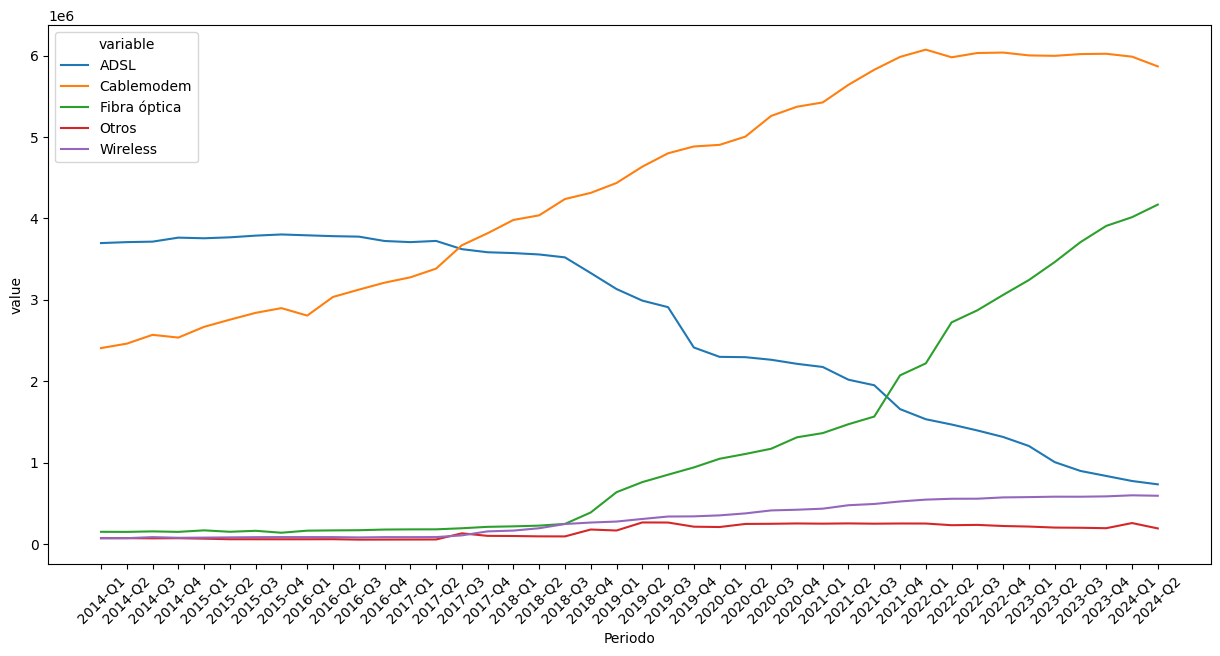

In [706]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)
sns.lineplot(data= totales_accesos_por_tecnologia_melted, x="Periodo", y="value", hue='variable')


Observación:

- CABLEMODEM: Incremento a lo largo de los últimos años con un freno a partir del año 2021.
- ADSL: Descenso constante
- Fibra Óptica: Comienza a incrementar inciando el año 2018-Q2.
- Wireless: Crecimiento constante.
- Otros: Crecimiento en el año 2017 y posterior freno.

## KPI: Tasa de crecimiento trimestral (TGR) o Tasa de crecimiento anual (AGR)
Queremos evaluar la tasa de crecimiento de cada tecnologia para ver su comportamiento en cada periodo.


In [708]:
#Cambiamos los nombres para un mejor entendimiento
totales_accesos_por_tecnologia_melted.rename(columns={"variable" : "Tecnologia", "value" : "Accesos"}, inplace=True)

In [717]:
#Ordenamos valores
totales_accesos_por_tecnologia_melted = totales_accesos_por_tecnologia_melted.sort_values(by=["Tecnologia", "Periodo"])

#Calculamos la tasa de crecimiento trimestral con ayuda del método pct_change
totales_accesos_por_tecnologia_melted['Crecimiento'] = totales_accesos_por_tecnologia_melted.groupby(by=["Tecnologia"])["Accesos"].pct_change()

In [ ]:
# Ejemplo de visualización del crecimiento trimestral
tech="Fibra óptica"
mask = totales_accesos_por_tecnologia_melted["Tecnologia"]==tech
totales_accesos_por_tecnologia_melted[mask].head()

,Año,Trimestre,Periodo,Total,Tecnologia,Accesos,Crecimiento
84,2014,1,2014-Q1,6398398,Fibra óptica,150323,NaN
85,2014,2,2014-Q2,6464468,Fibra óptica,149363,-0.006386
86,2014,3,2014-Q3,6595271,Fibra óptica,155494,0.041048
87,2014,4,2014-Q4,6598496,Fibra óptica,149682,-0.037378
88,2015,1,2015-Q1,6737732,Fibra óptica,168188,0.123635


In [732]:
# Cambios a formato WIDE, para anexar el BW-medio y evaluar
crecimiento_por_tecnologia = totales_accesos_por_tecnologia_melted.pivot(columns=["Tecnologia"], values="Crecimiento", index="Periodo").reset_index()
crecimiento_por_tecnologia.head()

Tecnologia,Periodo,ADSL,Cablemodem,Fibra óptica,Otros,Wireless
0,2014-Q1,NaN,NaN,NaN,NaN,NaN
1,2014-Q2,0.003196,0.022573,-0.006386,-0.010723,0.023407
2,2014-Q3,0.001586,0.043953,0.041048,-0.029093,0.175278
3,2014-Q4,0.013264,-0.013094,-0.037378,0.021756,-0.095328
4,2015-Q1,-0.002095,0.052057,0.123635,-0.077236,0.027460


In [ ]:
# Adaptamos el dataset total_vmd para poder hacer un merge.
total_vmd["Periodo"] = total_vmd["Año"].astype(str) + "-Q" + total_vmd["Trimestre"].astype(str)
total_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Periodo
0,2024,2,139.25,Abr-Jun 2024,2024-Q2
1,2024,1,139.15,Ene-Mar 2024,2024-Q1
2,2023,4,139.04,Oct-Dic 2023,2023-Q4
3,2023,3,129.67,Jul-Sept 2023,2023-Q3
4,2023,2,123.95,Abr-Jun 2023,2023-Q2


In [737]:
# Creamos un nuevo dataframe uniendo los mencionados
crecimiento_por_tecnologia_vs_bw_medio = pd.merge(crecimiento_por_tecnologia, total_vmd[["Periodo", "Mbps (Media de bajada)"]], on="Periodo")

# Creamos una nueva columna con la variación del BW
crecimiento_por_tecnologia_vs_bw_medio["Variación_BW"] = crecimiento_por_tecnologia_vs_bw_medio["Mbps (Media de bajada)"].pct_change()

# VISUALIZAMOS
crecimiento_por_tecnologia_vs_bw_medio

,Periodo,ADSL,Cablemodem,Fibra óptica,Otros,Wireless,Mbps (Media de bajada),Variación_BW
0,2014-Q1,NaN,NaN,NaN,NaN,NaN,3.617127,NaN
1,2014-Q2,0.003196,0.022573,-0.006386,-0.010723,0.023407,3.758712,0.039143
2,2014-Q3,0.001586,0.043953,0.041048,-0.029093,0.175278,3.867265,0.028880
3,2014-Q4,0.013264,-0.013094,-0.037378,0.021756,-0.095328,4.156888,0.074891
4,2015-Q1,-0.002095,0.052057,0.123635,-0.077236,0.027460,4.350279,0.046523
5,2015-Q2,0.003106,0.032998,-0.103152,-0.104293,0.037662,4.545381,0.044848
6,2015-Q3,0.005540,0.030443,0.078388,-0.003060,0.029887,4.788911,0.053577
7,2015-Q4,0.003782,0.020429,-0.144323,-0.005222,0.014149,4.990449,0.042084
8,2016-Q1,-0.002769,-0.031698,0.180936,0.001619,-0.004153,5.083702,0.018686
9,2016-Q2,-0.002744,0.081569,0.020788,0.012236,0.000961,5.423531,0.066847


In [762]:
crecimiento_por_tecnologia_vs_bw_medio[['ADSL' , 'Cablemodem' , 'Fibra óptica' ,'Otros', 'Wireless', 'Variación_BW']].mean()

ADSL           -0.037540
Cablemodem      0.022255
Fibra óptica    0.092055
Otros           0.049448
Wireless        0.056917
Variación_BW    0.098996
dtype: float64

Llegamos a una conclusión similar. La tecnología de fibra ha tenido una mayor adopción en los últimos años que las demas, y ADSL se encuentra siendo relegada para dar paso a otras tecnologias, incluida Cablemodem y Wireless.
Podría ser útil realizar un cálculo anual y evaluar en periodos recientes. 

# Accesos Por Tecnología
Representa la evolución por region de las tecnologias

In [763]:
accesos_por_tecnologia = file["Accesos Por Tecnología"]
accesos_por_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0
...,...,...,...,...,...,...,...,...,...
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Observación:
accesos_por_tecnologia.loc[1008]['Trimestre']

'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'

In [771]:
# Dropeamos NA
accesos_por_tecnologia.dropna(inplace=True)

#Normalizamos valores de provincias
#Primero aplicamos caps a todos los valores
accesos_por_tecnologia["Provincia"] = accesos_por_tecnologia["Provincia"].apply(str.upper)

#Removemos los acentos.
replace_dict = {"Á" : "A", "É" : "E", "Í" : "I", "Ó" : "O", "Ú": "U"}
for key, value in replace_dict.items():
    accesos_por_tecnologia["Provincia"] = accesos_por_tecnologia["Provincia"].apply(str.replace, args=(key, value))

# Ultimamente observamos que CABA y CAPITAL FEDERAL representan la misma provincia
accesos_por_tecnologia["Provincia"] = accesos_por_tecnologia["Provincia"].apply(str.replace, args=("CAPITAL FEDERAL", "CABA"))


In [ ]:
# Agregamos la columna periodo.
accesos_por_tecnologia["Periodo"] = accesos_por_tecnologia["Año"].astype(str) + "-Q" + accesos_por_tecnologia["Trimestre"].astype(str)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,BUENOS AIRES,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,2024-Q2
1,2024,2,CABA,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,2024-Q2
2,2024,2,CATAMARCA,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,2024-Q2
3,2024,2,CHACO,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,2024-Q2
4,2024,2,CHUBUT,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,2024-Q2
...,...,...,...,...,...,...,...,...,...,...
1002,2014,1,SANTA CRUZ,18927.0,100.0,381.0,4092.0,3264.0,26764.0,2014-Q1
1003,2014,1,SANTA FE,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,2014-Q1
1004,2014,1,SANTIAGO DEL ESTERO,32567.0,3598.0,19.0,915.0,34.0,37133.0,2014-Q1
1005,2014,1,TIERRA DEL FUEGO,21618.0,2837.0,648.0,1.0,2934.0,28038.0,2014-Q1


In [ ]:
# Podemos hacer un cruce con la evolución de la velocidad media para cada Provincia. 
# Dataset previo:
mean_speed_df

,Año,Trimestre,Provincia,Mbps (Media de bajada),Categoria,Periodo
0,2024,2,BUENOS AIRES,157.410000,1,2024-Q2
1,2024,2,CABA,233.010000,1,2024-Q2
2,2024,2,CATAMARCA,97.380000,2,2024-Q2
3,2024,2,CHACO,107.760000,1,2024-Q2
4,2024,2,CHUBUT,21.670000,4,2024-Q2
...,...,...,...,...,...,...
1003,2014,1,SANTA CRUZ,3.315991,4,2014-Q1
1004,2014,1,SANTA FE,3.147407,2,2014-Q1
1005,2014,1,SANTIAGO DEL ESTERO,2.949472,4,2014-Q1
1006,2014,1,TIERRA DEL FUEGO,3.446888,4,2014-Q1


In [797]:
# Realizamos el merge
accesos_por_tecnologia_bw = pd.merge(accesos_por_tecnologia, mean_speed_df[["Provincia", "Mbps (Media de bajada)", "Categoria", "Periodo"]], on=["Provincia", "Periodo"])

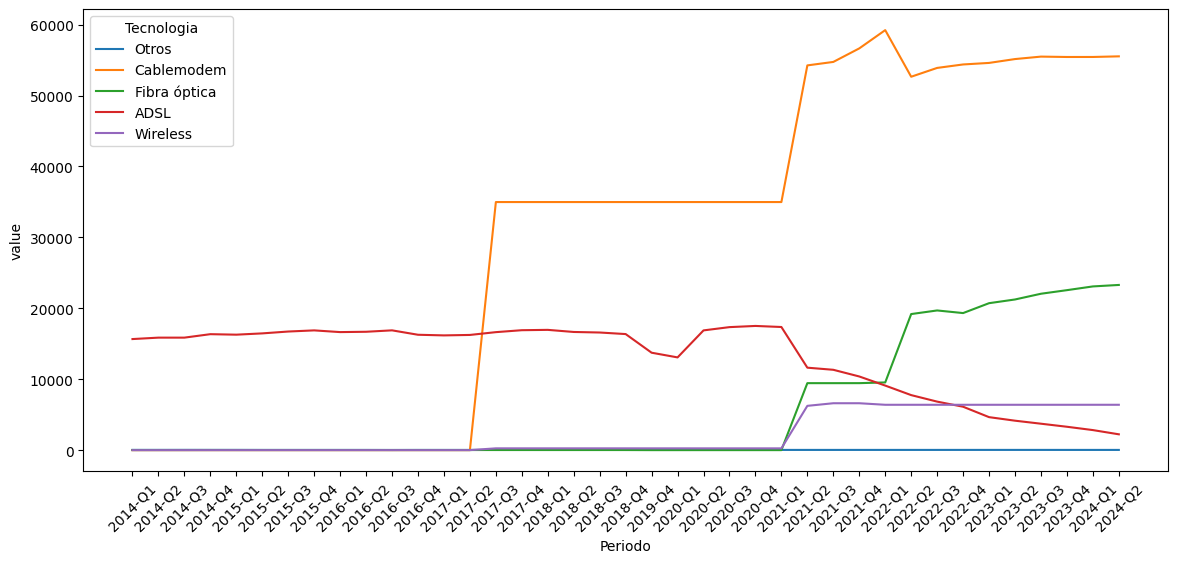

In [839]:
# De esta manera podemos graficar el comportamiento de los enlaces y el bw medio.
# filtro
provincia = "LA RIOJA"
mask = accesos_por_tecnologia_bw["Provincia"] == provincia
graph_data = accesos_por_tecnologia_bw[mask].drop(columns=["Año", "Trimestre", "Provincia", "Categoria"])

#TRansofmración para graficar correctamente. Aplicamos .melt()
graph_data_melted = graph_data.melt(id_vars=["Periodo", ], value_vars=["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"], var_name="Tecnologia").sort_values(by="Periodo")

#script gráfico
plt.figure(figsize=(14,6))
sns.lineplot(data = graph_data_melted, x="Periodo", y="value", hue="Tecnologia")

plt.xticks(rotation= 45)
plt.show()

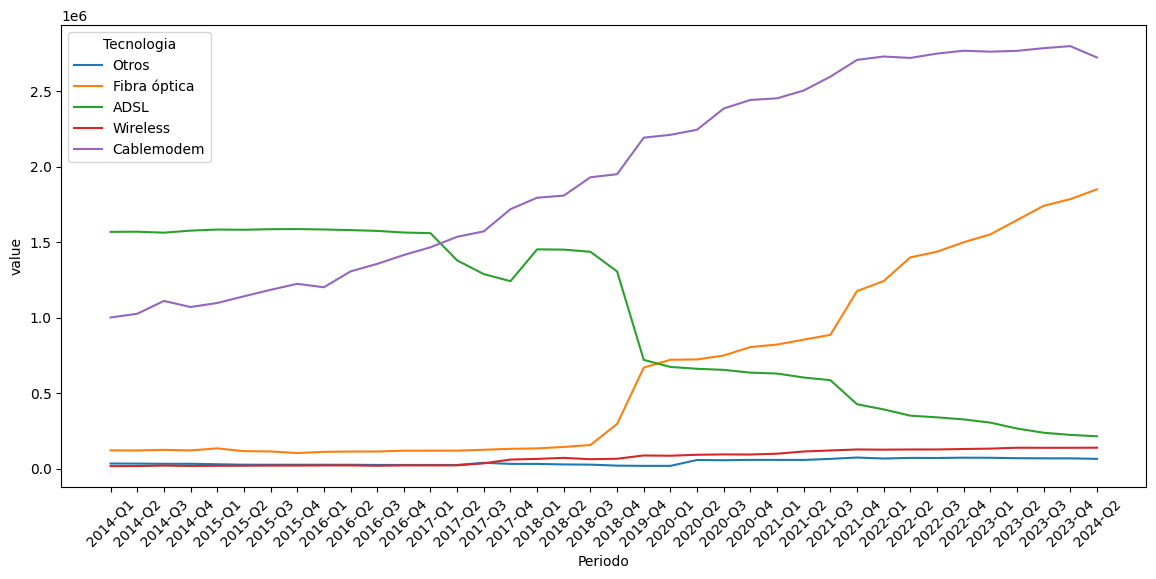

In [850]:
# Repetimos para otra provincia: BUENOS AIRES
# filtro
provincia = "BUENOS AIRES"
mask = accesos_por_tecnologia_bw["Provincia"] == provincia
graph_data = accesos_por_tecnologia_bw[mask].drop(columns=["Año", "Trimestre", "Provincia", "Categoria"])

#TRansofmración para graficar correctamente. Aplicamos .melt()
graph_data_melted = graph_data.melt(id_vars=["Periodo", ], value_vars=["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"], var_name="Tecnologia").sort_values(by="Periodo")

#script gráfico
plt.figure(figsize=(14,6))
sns.lineplot(data = graph_data_melted, x="Periodo", y="value", hue="Tecnologia")

plt.xticks(rotation= 45)
plt.show()

Como observamos, y si seguimos creando nuevos gráficos basados en provincias, observamos que cada provincia tiene diferentes tasas de crecimiento para diferentes tecnologías.
Posiblemente sea interesante comparar a nivel de las categorías previamente definidas, en especial la evolución de la fibra óptica y del cable modem. 

In [847]:
tecnologia="Fibra óptica"
graph_data = accesos_por_tecnologia_bw[["Provincia", "Categoria", tecnologia, "Periodo"]].sort_values(by=["Provincia", "Periodo"]).reset_index()
graph_data["percent_change"] = graph_data.groupby("Provincia")[tecnologia].pct_change()
graph_data = graph_data.drop(columns="index")
graph_data

,Provincia,Categoria,Fibra óptica,Periodo,percent_change
0,BUENOS AIRES,1,120960.0,2014-Q1,NaN
1,BUENOS AIRES,1,120008.0,2014-Q2,-0.007870
2,BUENOS AIRES,1,124474.0,2014-Q3,0.037214
3,BUENOS AIRES,1,120528.0,2014-Q4,-0.031701
4,BUENOS AIRES,1,134177.0,2015-Q1,0.113243
...,...,...,...,...,...
930,TUCUMAN,1,188986.0,2023-Q2,0.044260
931,TUCUMAN,1,195053.0,2023-Q3,0.032103
932,TUCUMAN,1,199876.0,2023-Q4,0.024727
933,TUCUMAN,1,205959.0,2024-Q1,0.030434


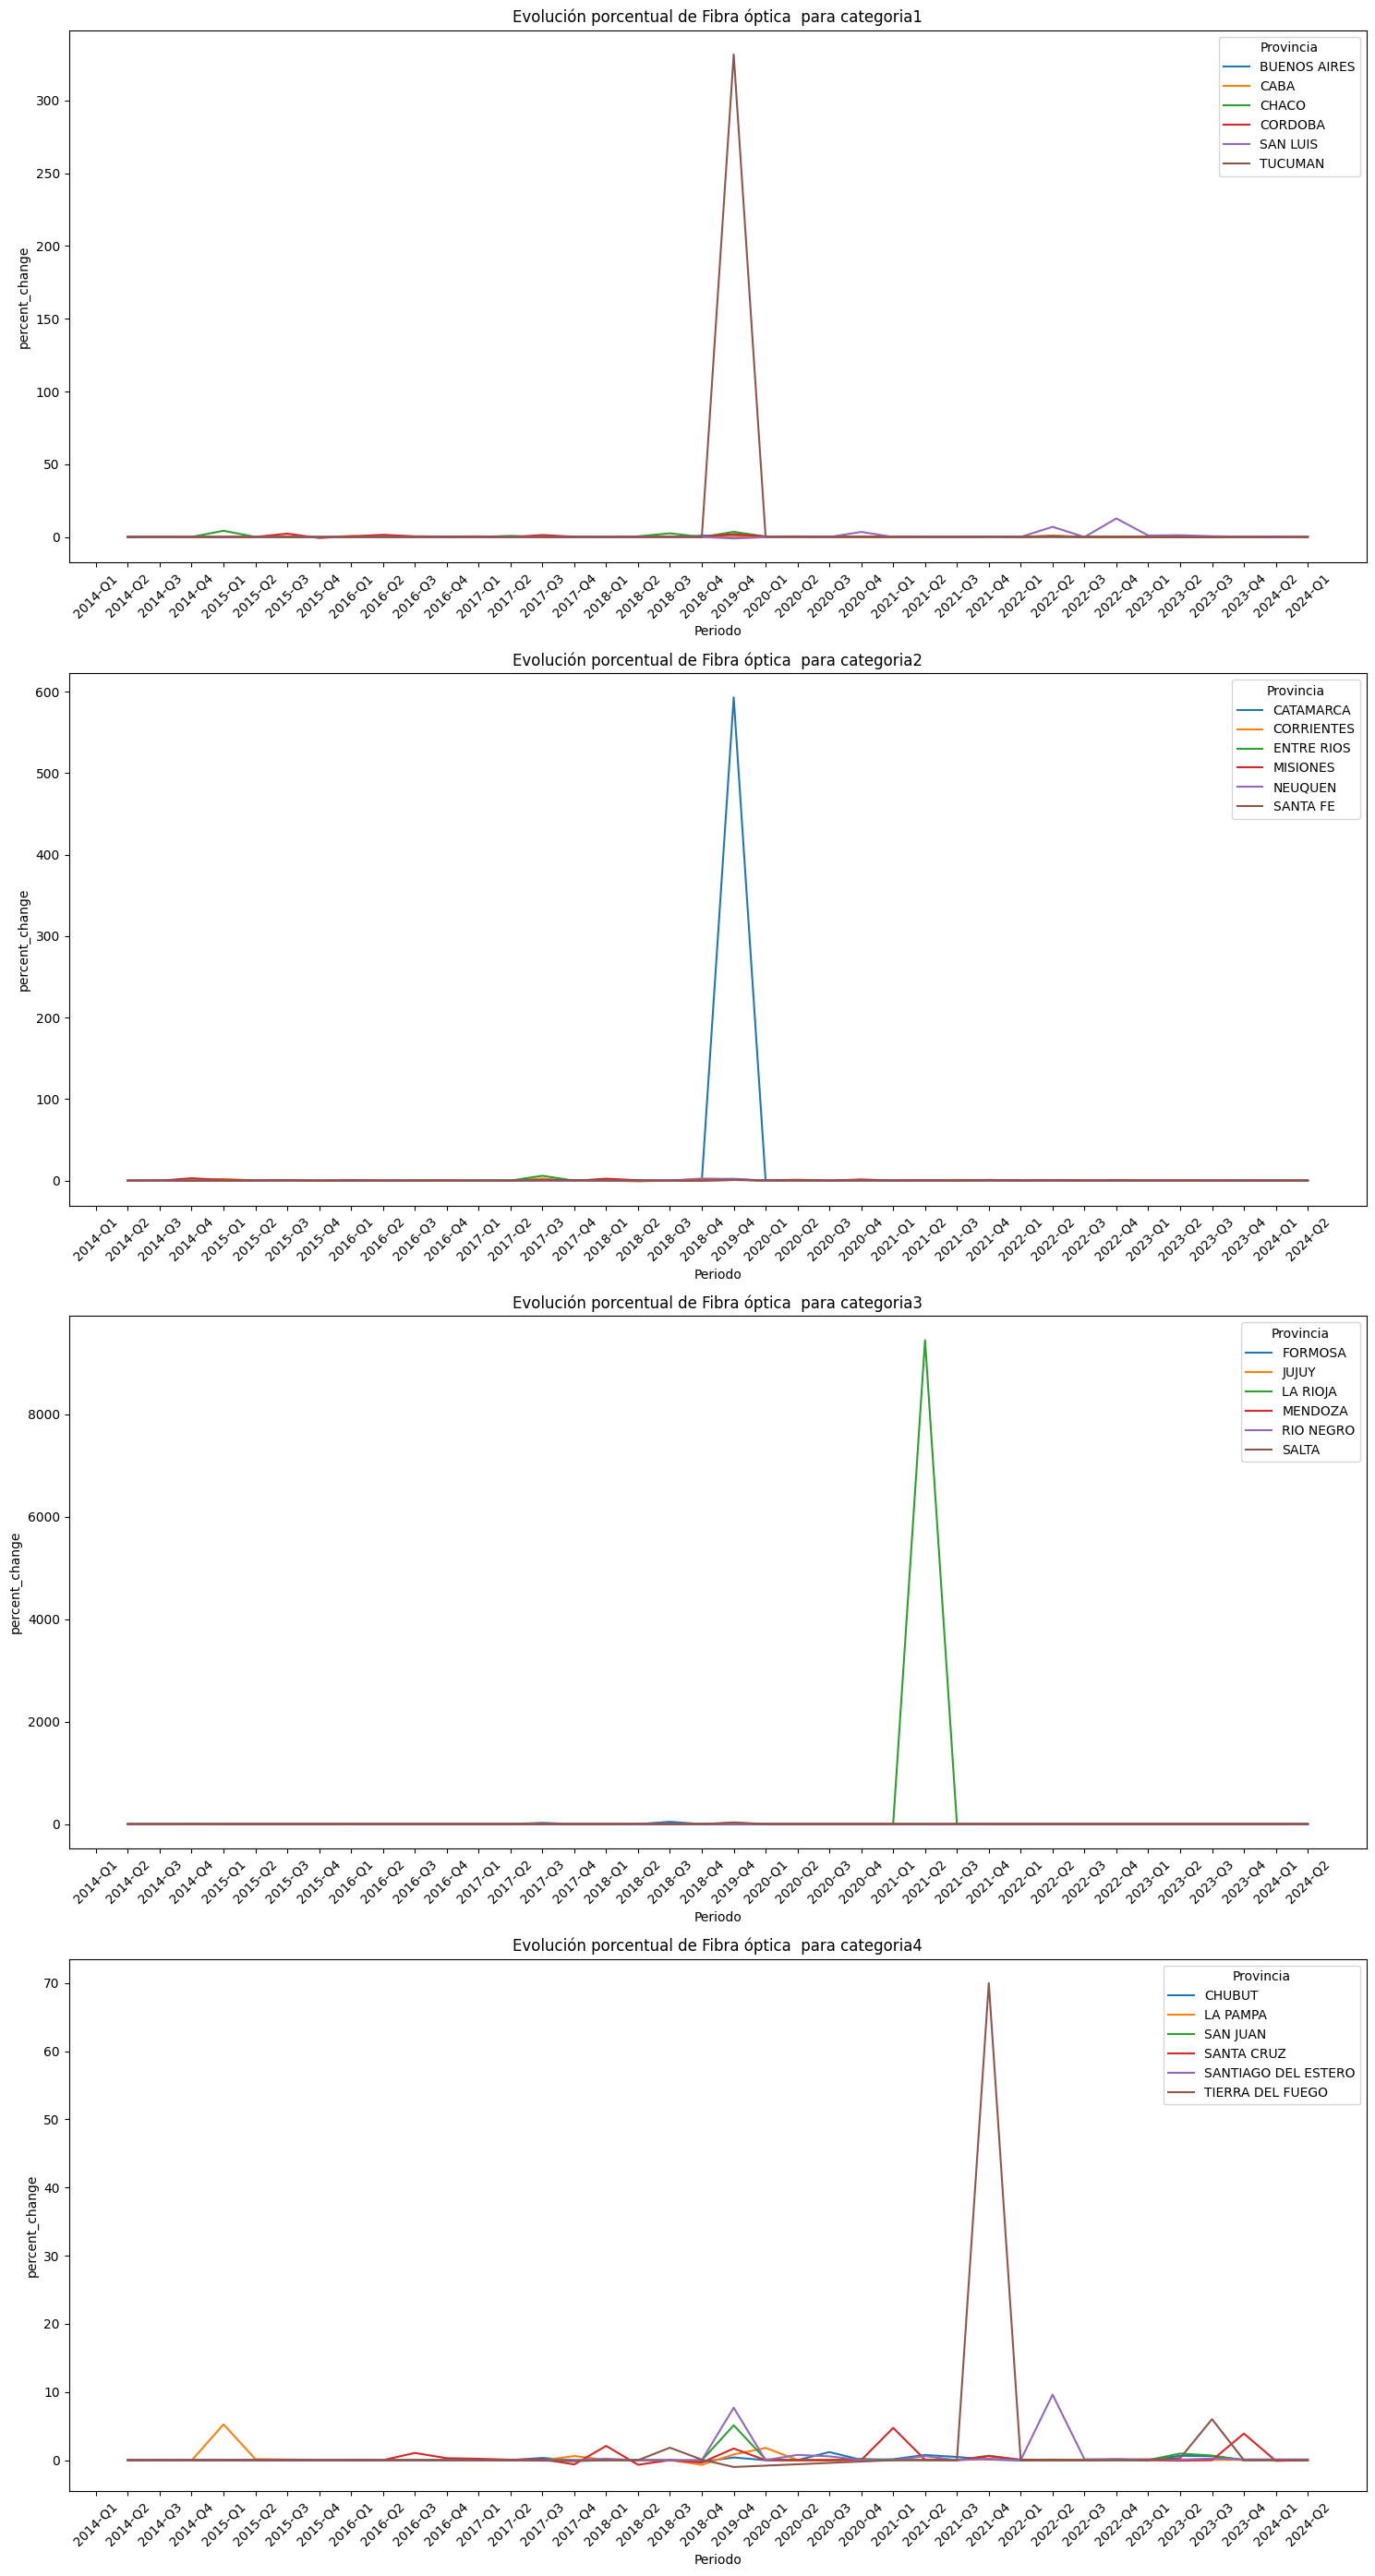

In [848]:
#Graficamos
fig, axes = plt.subplots(nrows=len(lista_categorias), ncols=1, figsize=(15, 7 * len(lista_categorias)))

for i, categoria in enumerate(lista_categorias):
    mask = graph_data["Categoria"] == categoria
    plot_df = graph_data[mask]

    sns.lineplot(data=plot_df, x="Periodo", y="percent_change", hue="Provincia", ax=axes[i])

    axes[i].set_title(f"Evolución porcentual de {tecnologia}  para categoria{categoria}")
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Observamos ciertos periodos de despliegue explosivos para fibra óptica. 

# Penetración-poblacion
Evolución de la cantidad de enlaces cada 100 habitantes por provincia

In [851]:
penetracion_poblacion = file["Penetración-poblacion"]

In [853]:
#Normalizamos valores de provincias
#Primero aplicamos caps a todos los valores
penetracion_poblacion["Provincia"] = penetracion_poblacion["Provincia"].apply(str.upper)

#Removemos los acentos.
replace_dict = {"Á" : "A", "É" : "E", "Í" : "I", "Ó" : "O", "Ú": "U"}
for key, value in replace_dict.items():
    penetracion_poblacion["Provincia"] = penetracion_poblacion["Provincia"].apply(str.replace, args=(key, value))

# Ultimamente observamos que CABA y CAPITAL FEDERAL representan la misma provincia
penetracion_poblacion["Provincia"] = penetracion_poblacion["Provincia"].apply(str.replace, args=("CAPITAL FEDERAL", "CABA"))


In [865]:
penetracion_poblacion.sort_values(by=["Provincia", "Año", "Trimestre"]).reset_index().head(50)

,index,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,984,2014,1,BUENOS AIRES,16.692346
1,960,2014,2,BUENOS AIRES,16.794925
2,936,2014,3,BUENOS AIRES,17.262998
3,912,2014,4,BUENOS AIRES,17.014763
4,888,2015,1,BUENOS AIRES,17.241393
5,864,2015,2,BUENOS AIRES,17.325663
6,840,2015,3,BUENOS AIRES,17.547884
7,816,2015,4,BUENOS AIRES,17.683349
8,792,2016,1,BUENOS AIRES,17.535079
9,768,2016,2,BUENOS AIRES,18.098685


# Penetracion-hogares
Evolución de la cantidad de accesos cada 100 hogares por provincia

In [859]:
penetracion_hogares = file["Penetracion-hogares"]

In [860]:
#Normalizamos valores de provincias
#Primero aplicamos caps a todos los valores
penetracion_hogares["Provincia"] = penetracion_hogares["Provincia"].apply(str.upper)

#Removemos los acentos.
replace_dict = {"Á" : "A", "É" : "E", "Í" : "I", "Ó" : "O", "Ú": "U"}
for key, value in replace_dict.items():
    penetracion_hogares["Provincia"] = penetracion_hogares["Provincia"].apply(str.replace, args=(key, value))

# Ultimamente observamos que CABA y CAPITAL FEDERAL representan la misma provincia
penetracion_hogares["Provincia"] = penetracion_hogares["Provincia"].apply(str.replace, args=("CAPITAL FEDERAL", "CABA"))

In [863]:
penetracion_hogares.sort_values(by=["Provincia", "Año", "Trimestre"]).head(50)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
984,2014,1,BUENOS AIRES,54.570073
960,2014,2,BUENOS AIRES,55.061417
936,2014,3,BUENOS AIRES,56.754739
912,2014,4,BUENOS AIRES,56.094337
888,2015,1,BUENOS AIRES,56.370484
864,2015,2,BUENOS AIRES,56.802806
840,2015,3,BUENOS AIRES,57.688681
816,2015,4,BUENOS AIRES,58.291822
792,2016,1,BUENOS AIRES,57.335908
768,2016,2,BUENOS AIRES,59.338527


# Totales Accesos por rango
Evolucion de accesos totales por rango de ancho de banda , la frecuencia es trimestral.

In [866]:
totales_accesos_rango = file["Totales Accesos por rango"]
totales_accesos_rango

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
5,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
6,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
7,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
8,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
9,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009


# Accesos por rangos
Versión detallado del dataset Totales accesos por rangos. especificando la evolución de cada provincia.

In [868]:
accesos_rango = file["Accesos por rangos"]
accesos_rango

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014,1,La Rioja,10.0,5111.0,9390.0,1165.0,35.0,0.0,0.0,0.0,15711.0
996,2014,1,Mendoza,35.0,6.0,166655.0,19.0,10.0,6.0,9.0,0.0,166740.0
997,2014,1,Misiones,545.0,14460.0,52852.0,5139.0,958.0,0.0,0.0,0.0,73954.0
998,2014,1,Neuquén,4133.0,987.0,77148.0,84.0,1582.0,2.0,22.0,0.0,83958.0


#

# Ingresos

In [871]:
ingresos_df = file["Ingresos "]

In [872]:
ingresos_df

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022
